
# Project: FBI Gun Data Analysis
## Author: Ankush Garg

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> FBI gun sales comes from National Instant Criminal Background Check System (NICS). NICS is responsible for verifying elligibility for firearms or explosives for potential buyers. The dataset provided by NICS is consists of monthly background check numbers - permits for guns (handguns, long guns, and other types of guns) - for all US states and territories.

> US census data includes various Census related measures such as population, income, etc. for certain time periods. 

### Questions to explore
> 1. Is there a general trend to gun sales?

> 2. Which states have seen the most increase in gun sales?

> 3. Growth in gun sales per capita? (with population increase)

> 4. What Census factors correlate with gun sales?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6
plt.style.use(['seaborn-muted'])
import datetime as dt

In [2]:
#read in guns data and show first 3 rows
guns = pd.read_csv('gun_data.csv')
guns.head(3)

month    state   permit  permit_recheck  handgun  long_gun  other  \
0  2017-09  Alabama  16717.0             0.0   5734.0    6320.0  221.0   
1  2017-09   Alaska    209.0             2.0   2320.0    2930.0  219.0   
2  2017-09  Arizona   5069.0           382.0  11063.0    7946.0  920.0   

   multiple  admin  prepawn_handgun  prepawn_long_gun  prepawn_other  \
0       317    0.0             15.0              21.0            2.0   
1       160    0.0              5.0               2.0            0.0   
2       631    0.0             13.0               6.0            0.0   

   redemption_handgun  redemption_long_gun  redemption_other  \
0              1378.0               1262.0               1.0   
1               200.0                154.0               2.0   
2              1474.0                748.0               3.0   

   returned_handgun  returned_long_gun  returned_other  rentals_handgun  \
0               0.0                0.0             0.0              0.0   
1              28.0               30.0             0.0              0.0   
2              82.0                5.0             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394

In [3]:
#read in census data and look at top 3 rows
census = pd.read_csv('U.S. Census Data.csv')
census.head(3)

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   
2  Population, percent change - April 1, 2010 (es...       NaN      1.70%   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2    4.50%      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   

      Florida     Georgia     Hawaii      Idaho    Illinois    Indiana  \
0  20,612,439  10,310,371  1,428,557  1,683,140  12,801,539  6,633,053   
1  18,804,592   9,688,680  1,360,301  1,567,650  12,831,574  6,484,136   
2       9.60%       6.40%      5.00%      7.40%      -0.20%      2.30%   

        Iowa     Kansas   Kentucky  Louisiana      Maine   Maryland  \
0  3,134,693  2,907,289  4,436,974  4,681,666  1,331,479  6,016,447   
1  3,046,869  2,853,129  4,339,344  4,533,479  1,328,364  5,773,786   
2      2.90%      1.90%      2.20%      3.30%      0.20%      4.20%   

  Massachusetts   Michigan  Minnesota Mississippi   Missouri    Montana  \
0     6,811,779  9,928,300  5,519,952   2,988,726  6,093,000  1,042,520   
1     6,547,813  9,884,129  5,303,924   2,968,103  5,988,928    989,414   
2         4.00%      0.40%      4.10%       0.70%      1.70%      5.40%   

    Nebraska     Nevada New Hampshire New Jersey New Mexico  New York  \
0  1,907,116  2,940,058     1,334,795  8,944,469    2081015  19745289   
1  1,826,334  2,700,691     1,316,461  8,791,953    2059198  19378110   
2      4.40%      8.90%         1.40%      1.70%      0.011     0.019   

  North Carolina North Dakota      Ohio Oklahoma   Oregon Pennsylvania  \
0       10146788       757952  11614373  3923561  4093465     12784227   
1        9535688       672591  11536727  3751615  3831072     12702857   
2          0.064        0.127     0.007    0.046    0.068        0.006   

  Rhode Island South Carolina South Dakota Tennessee       Texas       Utah  \
0      1056426        4961119       865454   6651194  27,862,596  3,051,217   
1      1052940        4625410       814195   6346298  25,146,100  2,763,888   
2        0.003          0.073        0.063     0.048      10.80%     10.40%   

   Vermont   Virginia Washington West Virginia  Wisconsin  Wyoming  
0  624,594  8,411,808  7,288,000     1,831,102  5,778,708  585,501  
1  625,741  8,001,041  6,724,545     1,853,011  5,687,289  563,767  
2   -0.20%      5.10%      8.40%        -1.20%      1.60%    3.90%

In [4]:
#number of rows and columns
guns.shape

(12485, 27)

In [5]:
#number of rows and columns
census.shape

(85, 52)

In [6]:
#summary statistics on each column
guns.describe()

permit  permit_recheck        handgun       long_gun  \
count   12461.000000     1100.000000   12465.000000   12466.000000   
mean     6413.629404     1165.956364    5940.881107    7810.847585   
std     23752.338269     9224.200609    8618.584060    9309.846140   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000     865.000000    2078.250000   
50%       518.000000        0.000000    3059.000000    5122.000000   
75%      4272.000000        0.000000    7280.000000   10380.750000   
max    522188.000000   116681.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count   5500.000000  12485.000000  12462.000000     10542.000000   
mean     360.471636    268.603364     58.898090         4.828021   
std     1349.478273    783.185073    604.814818        10.907756   
min        0.000000      0.000000      0.000000         0.000000   
25%       17.000000     15.000000      0.000000         0.000000   
50%      121.000000    125.000000      0.000000         0.000000   
75%      354.000000    301.000000      0.000000         5.000000   
max    77929.000000  38907.000000  28083.000000       164.000000   

       prepawn_long_gun  prepawn_other  redemption_handgun  \
count      10540.000000    5115.000000        10545.000000   
mean           7.834156       0.165591          407.970413   
std           16.468028       1.057105          783.467053   
min            0.000000       0.000000            0.000000   
25%            0.000000       0.000000            0.000000   
50%            1.000000       0.000000           39.000000   
75%            8.000000       0.000000          561.000000   
max          269.000000      49.000000        10046.000000   

       redemption_long_gun  redemption_other  returned_handgun  \
count         10544.000000       5115.000000       2200.000000   
mean            599.332417          1.815249         29.612727   
std             952.144809          4.574641         81.943020   
min               0.000000          0.000000          0.000000   
25%               0.000000          0.000000          0.000000   
50%             175.000000          0.000000          0.000000   
75%             872.000000          2.000000         16.000000   
max            8831.000000         79.000000        603.000000   

       returned_long_gun  returned_other  rentals_handgun  rentals_long_gun  \
count        2145.000000     1815.000000       990.000000        825.000000   
mean            7.557576        1.027548         0.076768          0.087273   
std            22.097046        4.386296         0.634503          0.671649   
min             0.000000        0.000000         0.000000          0.000000   
25%             0.000000        0.000000         0.000000          0.000000   
50%             0.000000        0.000000         0.000000          0.000000   
75%             4.000000        0.000000         0.000000          0.000000   
max           168.000000       64.000000        12.000000         12.000000   

       private_sale_handgun  private_sale_long_gun  private_sale_other  \
count           2750.000000            2750.000000         2750.000000   
mean              14.936000              11.602909            1.030182   
std               71.216021              54.253090            4.467843   
min                0.000000               0.000000            0.000000   
25%                0.000000               0.000000            0.000000   
50%                0.000000               0.000000            0.000000   
75%                2.000000               4.000000            0.000000   
max             1017.000000             777.000000           71.000000   

       return_to_seller_handgun  return_to_seller_long_gun  \
count               2475.000000                2750.000000   
mean                   0.402020                   0.441818   
std                    1.446568                   1

> On average, approximately 21k total permit are done every month. Maximum background checks in a month were 540k

In [7]:
#summary statistics on each column
census.describe()

Fact Fact Note  Alabama Alaska Arizona Arkansas  \
count                      80        28       65     65      65       65   
unique                     80        15       65     64      64       64   
top     Households, 2011-2015       (c)  137,630  7.30%  50.30%   50.90%   
freq                        1         6        1      2       2        2   

       California Colorado Connecticut Delaware Florida Georgia Hawaii  \
count          65       65          65       65      65      65     65   
unique         63       64          63       64      64      64     63   
top        50.30%    3.30%       5.70%   51.60%  51.10%   6.40%  6.40%   
freq            2        2           2        2       2       2      2   

         Idaho Illinois Indiana  Iowa  Kansas   Kentucky Louisiana  Maine  \
count       65       65      65    65      65         65        65     65   
unique      63       65      63    65      65         65        65     64   
top     49.90%   24.40%   2.20%  "19"  24.60%  7,500,115    14,503  1.60%   
freq         2        1       2     1       1          1         1      2   

       Maryland Massachusetts Michigan Minnesota Mississippi Missouri Montana  \
count        65            65       65        65          65       65      65   
unique       64            65       64        65          65       64      65   
top      51.60%        13.80%    6.30%    45,582   2,967,297   14.00%  93,393   
freq          2             1        2         1           1        2       1   

          Nebraska  Nevada New Hampshire New Jersey New Mexico New York  \
count           65      65            65         65         65       65   
unique          65      63            65         65         64       65   
top     57,499,177  23.00%        16,119    $2,386       0.025  7262279   
freq             1       2             1          1          2        1   

       North Carolina North Dakota   Ohio Oklahoma Oregon Pennsylvania  \
count              65           65     65       65     65           65   
unique             65           63     64       64     63           65   
top            223209       672591  0.022    0.505  0.038        0.095   
freq                1            2      2        2      2            1   

       Rhode Island South Carolina South Dakota Tennessee   Texas   Utah  \
count            65             65           65        65      65     65   
unique           64             65           65        64      64     64   
top            0.01        9763818        0.834     0.048  50.40%  2.50%   
freq              2              1            1         2       2      2   

       Vermont Virginia Washington West Virginia Wisconsin Wyoming  
count       65       65         65            65        65      65  
unique      63       65         65            64        65      64  
top      1.90%   19.80%      8.60%         1.50%     $532    7.10%  
freq         2        1          1             2         1       2

> Census data represented as strings as opposed to numerical data

In [8]:
#check for missing values and data types
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

>Almost all the columns are numeric with the exception of month and state. Need to amend date column to a datetime object to perform time-series analysis. The rest of the dataset is very clean. 

In [9]:
#check for missing values and data types
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

#### Cleaning tasks

##### Guns
1. Need to amend date column to a datetime object to perform time-series analysis.

##### Census
1. All numerical data is being read as object type - due to "," and "%" characters
2. Fact has 80 entries, while the rest of the dataset has 65 entries
3. No District of Columbia, Guam, Virgin Islands, Puerto Rico or Mariana Islands included in the census dataset
4. Fact Note column only has 28 entries
5. Pivot the dataframe reflected states in a column
6. Rename columns

### Data Cleaning

In [10]:
# month column to datetime oject and as index
guns['month'] = pd.to_datetime(guns['month'])
guns.set_index('month', inplace = True)
guns.head()

state   permit  permit_recheck  handgun  long_gun   other  \
month                                                                        
2017-09-01     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
2017-09-01      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2017-09-01     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
2017-09-01    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
2017-09-01  California  57839.0             0.0  37165.0   24581.0  2984.0   

            multiple  admin  prepawn_handgun  prepawn_long_gun  prepawn_other  \
month                                                                           
2017-09-01       317    0.0             15.0              21.0            2.0   
2017-09-01       160    0.0              5.0               2.0            0.0   
2017-09-01       631    0.0             13.0               6.0            0.0   
2017-09-01       366   51.0             12.0              13.0            0.0   
2017-09-01         0    0.0              0.0               0.0            0.0   

            redemption_handgun  redemption_long_gun  redemption_other  \
month                                                                   
2017-09-01              1378.0               1262.0               1.0   
2017-09-01               200.0                154.0               2.0   
2017-09-01              1474.0                748.0               3.0   
2017-09-01              1296.0               1824.0               4.0   
2017-09-01               535.0                397.0               5.0   

            returned_handgun  returned_long_gun  returned_other  \
month                                                             
2017-09-01               0.0                0.0             0.0   
2017-09-01              28.0               30.0             0.0   
2017-09-01              82.0                5.0             0.0   
2017-09-01               0.0                0.0             0.0   
2017-09-01               0.0                0.0             0.0   

            rentals_handgun  rentals_long_gun  private_sale_handgun  \
month                                                                 
2017-09-01              0.0               0.0                   9.0   
2017-09-01              0.0               0.0                  17.0   
2017-09-01              0.0               0.0                  38.0   
2017-09-01              0.0               0.0                  13.0   
2017-09-01              0.0               0.0                   0.0   

            private_sale_long_gun  private_sale_other  \
month                                                   
2017-09-01                   16.0                 3.0   
2017-09-01                   24.0                 1.0   
2017-09-01                   12.0                 2.0   
2017-09-01                   23.0                 0.0   
2017-09-01                    0.0                 0.0   

            return_to_seller_handgun  return_to_seller_long_gun  \
month                                                             
2017-09-01                       0.0                        0.0   
2017-09-01                       0.0                        0.0   
2017-09-01                       0.0                        0.0   
2017-09-01                       0.0                        2.0   
2017-09-01                       0.0                        0.0   

            return_to_seller_other  totals  
month                                       
2017-09-01                     3.0   32019  
2017-09-01                     0.0    6303  
2017-09-01                     0.0   28394  
2017-09-01                     1.0   17747  
2017-09-01                     0.0  123506

In [11]:
# drop Fact Note column as its mostly NULL
census.drop('Fact Note', axis = 1, inplace = True)

In [12]:
#check out the last 25 rows
census.tail(25)

Fact    Alabama      Alaska  \
60                          Veteran-owned firms, 2012     41,943       7,953   
61                       Nonveteran-owned firms, 2012    316,984      56,091   
62                   Population per square mile, 2010       94.4         1.2   
63                    Land area in square miles, 2010  50,645.33  570,640.95   
64                                          FIPS Code       "01"        "02"   
65                                                NaN        NaN         NaN   
66  NOTE: FIPS Code values are enclosed in quotes ...        NaN         NaN   
67                                                NaN        NaN         NaN   
68                                        Value Notes        NaN         NaN   
69                                                  1        NaN         NaN   
70                                                NaN        NaN         NaN   
71                                         Fact Notes        NaN         NaN   
72                                                (a)        NaN         NaN   
73                                                (b)        NaN         NaN   
74                                                (c)        NaN         NaN   
75                                                NaN        NaN         NaN   
76                                        Value Flags        NaN         NaN   
77                                                  -        NaN         NaN   
78                                                  D        NaN         NaN   
79                                                  F        NaN         NaN   
80                                                 FN        NaN         NaN   
81                                                NaN        NaN         NaN   
82                                                  S        NaN         NaN   
83                                                  X        NaN         NaN   
84                                                  Z        NaN         NaN   

       Arizona   Arkansas  California    Colorado Connecticut  Delaware  \
60      46,780     25,915     252,377      51,722      31,056     7,206   
61     427,582    192,988   3,176,341     469,524     281,182    60,318   
62        56.3         56       239.1        48.5       738.1     460.8   
63  113,594.08  52,035.48  155,779.22  103,641.89    4,842.36  1,948.54   
64        "04"       "05"        "06"        "08"        "09"      "10"   
65         NaN        NaN         NaN         NaN         NaN       NaN   
66         NaN        NaN         NaN         NaN         NaN       NaN   
67         NaN        NaN         NaN         NaN         NaN       NaN   
68         NaN        NaN         NaN         NaN         NaN       NaN   
69         NaN        NaN         NaN         NaN         NaN       NaN   
70         NaN        NaN         NaN         NaN         NaN       NaN   
71         NaN        NaN         NaN         NaN         NaN       NaN   
72         NaN        NaN         NaN         NaN         NaN       NaN   
73         NaN        NaN         NaN         NaN         NaN       NaN   
74         NaN        NaN         NaN         NaN         NaN       NaN   
75         NaN        NaN         NaN         NaN         NaN       NaN   
76         NaN        NaN         NaN         NaN         NaN       NaN   
77         NaN        NaN         NaN         NaN         NaN       NaN   
78         NaN        NaN         NaN         NaN         NaN       NaN   
79         NaN        NaN         NaN         NaN         NaN       NaN   
80         NaN        NaN         NaN         NaN         NaN       NaN   
81         NaN        NaN         NaN         NaN         NaN       NaN   
82         NaN        NaN         NaN         NaN         NaN       NaN   
83         NaN        NaN         NaN         NaN         NaN       NaN   
84         NaN        NaN         NaN         NaN         NaN       NaN   

      Florida    

> Seems like the dataset is only up until index = 63. There's a key on how to interpret the rest of the census data

In [13]:
#only keep top 63 rows going forward
census = census.head(64)

In [14]:
# create a list of all the states
states = census.columns.drop('Fact').tolist()

#run a for loop through each column to omit all instance of ",", "$" and "%"
for i in states:
    census[i] = census[i].apply(lambda x:x.replace(",",""))
    census[i] = census[i].apply(lambda x:x.replace("$",""))
    census[i] = census[i].apply(lambda x:x.replace("%",""))
    
census.head(3)

Fact  Alabama  Alaska  \
0       Population estimates, July 1, 2016,  (V2016)  4863300  741894   
1  Population estimates base, April 1, 2010,  (V2...  4780131  710249   
2  Population, percent change - April 1, 2010 (es...     1.70    4.50   

   Arizona Arkansas California Colorado Connecticut Delaware   Florida  \
0  6931071  2988248   39250017  5540545     3576452   952065  20612439   
1  6392301  2916025   37254522  5029324     3574114   897936  18804592   
2     8.40     2.50       5.40    10.20        0.10     6.00      9.60   

    Georgia   Hawaii    Idaho  Illinois  Indiana     Iowa   Kansas Kentucky  \
0  10310371  1428557  1683140  12801539  6633053  3134693  2907289  4436974   
1   9688680  1360301  1567650  12831574  6484136  3046869  2853129  4339344   
2      6.40     5.00     7.40     -0.20     2.30     2.90     1.90     2.20   

  Louisiana    Maine Maryland Massachusetts Michigan Minnesota Mississippi  \
0   4681666  1331479  6016447       6811779  9928300   5519952     2988726   
1   4533479  1328364  5773786       6547813  9884129   5303924     2968103   
2      3.30     0.20     4.20          4.00     0.40      4.10        0.70   

  Missouri  Montana Nebraska   Nevada New Hampshire New Jersey New Mexico  \
0  6093000  1042520  1907116  2940058       1334795    8944469    2081015   
1  5988928   989414  1826334  2700691       1316461    8791953    2059198   
2     1.70     5.40     4.40     8.90          1.40       1.70      0.011   

   New York North Carolina North Dakota      Ohio Oklahoma   Oregon  \
0  19745289       10146788       757952  11614373  3923561  4093465   
1  19378110        9535688       672591  11536727  3751615  3831072   
2     0.019          0.064        0.127     0.007    0.046    0.068   

  Pennsylvania Rhode Island South Carolina South Dakota Tennessee     Texas  \
0     12784227      1056426        4961119       865454   6651194  27862596   
1     12702857      1052940        4625410       814195   6346298  25146100   
2        0.006        0.003          0.073        0.063     0.048     10.80   

      Utah Vermont Virginia Washington West Virginia Wisconsin Wyoming  
0  3051217  624594  8411808    7288000       1831102   5778708  585501  
1  2763888  625741  8001041    6724545       1853011   5687289  563767  
2    10.40   -0.20     5.10       8.40         -1.20      1.60    3.90

In [15]:
#convert census to numerical data type
census[states] = census[states].apply(pd.to_numeric, errors='coerce')
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 51 columns):
Fact              64 non-null object
Alabama           64 non-null float64
Alaska            63 non-null float64
Arizona           64 non-null float64
Arkansas          64 non-null float64
California        64 non-null float64
Colorado          64 non-null float64
Connecticut       64 non-null float64
Delaware          64 non-null float64
Florida           64 non-null float64
Georgia           64 non-null float64
Hawaii            63 non-null float64
Idaho             64 non-null float64
Illinois          64 non-null float64
Indiana           64 non-null float64
Iowa              64 non-null float64
Kansas            64 non-null float64
Kentucky          64 non-null float64
Louisiana         64 non-null float64
Maine             63 non-null float64
Maryland          64 non-null float64
Massachusetts     64 non-null float64
Michigan          63 non-null float64
Minnesota         64 non

In [16]:
#pivot census with states in a column and Fact table values as individual columns
census = census.pivot_table(columns = census.Fact).reset_index()
census.head(3)

Fact    index  All firms, 2012  \
0     Alabama         374153.0   
1      Alaska          68032.0   
2     Arizona         499926.0   

Fact  American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)  \
0                                                   0.7                          
1                                                  15.2                          
2                                                   5.4                          

Fact  Asian alone, percent, July 1, 2016,  (V2016)  \
0                                              1.4   
1                                              6.3   
2                                              3.4   

Fact  Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015  \
0                                                  23.5                          
1                                                  28.0                          
2                                                  27.5                          

Fact  Black or African American alone, percent, July 1, 2016,  (V2016)  \
0                                                  26.8                  
1                                                   3.8                  
2                                                   4.9                  

Fact  Building permits, 2016  \
0                    15001.0   
1                     1503.0   
2                    35578.0   

Fact  Female persons, percent,  July 1, 2016,  (V2016)  \
0                                                 51.6   
1                                                 47.7   
2                                                 50.3   

Fact  Female persons, percent, April 1, 2010  \
0                                       51.5   
1                                       48.0   
2                                       50.3   

Fact  Foreign born persons, percent, 2011-2015  \
0                                          3.5   
1                                          7.4   
2                                         13.5   

Fact  High school graduate or higher, percent of persons age 25 years+, 2011-2015  \
0                                                  84.3                             
1                                                  92.1                             
2                                                  86.0                             

Fact  Hispanic or Latino, percent, July 1, 2016,  (V2016)  \
0                                                   4.2     
1                                                   7.0     
2                                                  30.9     

Fact  Households, 2011-2015  Housing units,  July 1, 2016,  (V2016)  \
0                 1848325.0                               2230185.0   
1                  250969.0                                310658.0   
2                 2412212.0                               2961003.0   

Fact  Housing units, April 1, 2010  \
0                        2171853.0   
1                         306967.0   
2                        2844526.0   

Fact  In civilian labor force, female, percent of population age 16 years+, 2011-2015  \
0                                                  53.0                                 
1                                                  65.0                                 
2                                                  54.5                                 

Fact  In civilian labor force, total, percent of population age 16 years+, 2011-2015  \
0                                                  58.0                                
1                                                  67.7                                
2                                                  59.3                                

Fact  Land area in square miles, 2010  \
0                            50645.33   
1                           570640.95   
2                           113594.08   

Fact  Language other than English sp

In [17]:
#remove "," and make all column names to lowercase
census.rename(columns=lambda x: x.replace(',',"_"), inplace=True)
census.rename(columns=lambda x: x.replace(' ',"_"), inplace=True)
census.columns = census.columns.str.lower()
census.head(3)

Fact    index  all_firms__2012  \
0     Alabama         374153.0   
1      Alaska          68032.0   
2     Arizona         499926.0   

Fact  american_indian_and_alaska_native_alone__percent__july_1__2016___(v2016)  \
0                                                   0.7                          
1                                                  15.2                          
2                                                   5.4                          

Fact  asian_alone__percent__july_1__2016___(v2016)  \
0                                              1.4   
1                                              6.3   
2                                              3.4   

Fact  bachelor's_degree_or_higher__percent_of_persons_age_25_years+__2011-2015  \
0                                                  23.5                          
1                                                  28.0                          
2                                                  27.5                          

Fact  black_or_african_american_alone__percent__july_1__2016___(v2016)  \
0                                                  26.8                  
1                                                   3.8                  
2                                                   4.9                  

Fact  building_permits__2016  \
0                    15001.0   
1                     1503.0   
2                    35578.0   

Fact  female_persons__percent___july_1__2016___(v2016)  \
0                                                 51.6   
1                                                 47.7   
2                                                 50.3   

Fact  female_persons__percent__april_1__2010  \
0                                       51.5   
1                                       48.0   
2                                       50.3   

Fact  foreign_born_persons__percent__2011-2015  \
0                                          3.5   
1                                          7.4   
2                                         13.5   

Fact  high_school_graduate_or_higher__percent_of_persons_age_25_years+__2011-2015  \
0                                                  84.3                             
1                                                  92.1                             
2                                                  86.0                             

Fact  hispanic_or_latino__percent__july_1__2016___(v2016)  \
0                                                   4.2     
1                                                   7.0     
2                                                  30.9     

Fact  households__2011-2015  housing_units___july_1__2016___(v2016)  \
0                 1848325.0                               2230185.0   
1                  250969.0                                310658.0   
2                 2412212.0                               2961003.0   

Fact  housing_units__april_1__2010  \
0                        2171853.0   
1                         306967.0   
2                        2844526.0   

Fact  in_civilian_labor_force__female__percent_of_population_age_16_years+__2011-2015  \
0                                                  53.0                                 
1                                                  65.0                                 
2                                                  54.5                                 

Fact  in_civilian_labor_force__total__percent_of_population_age_16_years+__2011-2015  \
0                                                  58.0                                
1                                                  67.7                                
2                                                  59.3                                

Fact  land_area_in_square_miles__2010  \
0                            50645.33   
1                           570640.95   
2                           113594.08   

Fact  language_other_than_english_sp

In [18]:
#change column name index to state
census.rename(columns= {'index':'state'}, inplace= True)
census.head(3)

Fact    state  all_firms__2012  \
0     Alabama         374153.0   
1      Alaska          68032.0   
2     Arizona         499926.0   

Fact  american_indian_and_alaska_native_alone__percent__july_1__2016___(v2016)  \
0                                                   0.7                          
1                                                  15.2                          
2                                                   5.4                          

Fact  asian_alone__percent__july_1__2016___(v2016)  \
0                                              1.4   
1                                              6.3   
2                                              3.4   

Fact  bachelor's_degree_or_higher__percent_of_persons_age_25_years+__2011-2015  \
0                                                  23.5                          
1                                                  28.0                          
2                                                  27.5                          

Fact  black_or_african_american_alone__percent__july_1__2016___(v2016)  \
0                                                  26.8                  
1                                                   3.8                  
2                                                   4.9                  

Fact  building_permits__2016  \
0                    15001.0   
1                     1503.0   
2                    35578.0   

Fact  female_persons__percent___july_1__2016___(v2016)  \
0                                                 51.6   
1                                                 47.7   
2                                                 50.3   

Fact  female_persons__percent__april_1__2010  \
0                                       51.5   
1                                       48.0   
2                                       50.3   

Fact  foreign_born_persons__percent__2011-2015  \
0                                          3.5   
1                                          7.4   
2                                         13.5   

Fact  high_school_graduate_or_higher__percent_of_persons_age_25_years+__2011-2015  \
0                                                  84.3                             
1                                                  92.1                             
2                                                  86.0                             

Fact  hispanic_or_latino__percent__july_1__2016___(v2016)  \
0                                                   4.2     
1                                                   7.0     
2                                                  30.9     

Fact  households__2011-2015  housing_units___july_1__2016___(v2016)  \
0                 1848325.0                               2230185.0   
1                  250969.0                                310658.0   
2                 2412212.0                               2961003.0   

Fact  housing_units__april_1__2010  \
0                        2171853.0   
1                         306967.0   
2                        2844526.0   

Fact  in_civilian_labor_force__female__percent_of_population_age_16_years+__2011-2015  \
0                                                  53.0                                 
1                                                  65.0                                 
2                                                  54.5                                 

Fact  in_civilian_labor_force__total__percent_of_population_age_16_years+__2011-2015  \
0                                                  58.0                                
1                                                  67.7                                
2                                                  59.3                                

Fact  land_area_in_square_miles__2010  \
0                            50645.33   
1                           570640.95   
2                           113594.08   

Fact  language_other_than_english_sp

<a id='eda'></a>
## Exploratory Data Analysis


### Before we start analyzing gun sales, take a look at what states are included in the data?

In [19]:
#quick check to see state completeness
guns.state.nunique()

55

> There's 55 unique states. Take a look at what's there.

In [20]:
#unique states and how many entries for each of them
guns.state.value_counts()

Rhode Island            227
Indiana                 227
South Dakota            227
Hawaii                  227
Nebraska                227
Michigan                227
Pennsylvania            227
Wyoming                 227
Arizona                 227
Vermont                 227
Georgia                 227
Illinois                227
Ohio                    227
Kansas                  227
Mariana Islands         227
Wisconsin               227
Utah                    227
Alabama                 227
Louisiana               227
California              227
Maine                   227
Missouri                227
Mississippi             227
Nevada                  227
Maryland                227
Alaska                  227
Tennessee               227
Idaho                   227
Arkansas                227
Virginia                227
Virgin Islands          227
Kentucky                227
Montana                 227
New York                227
New Hampshire           227
New Jersey          

>DC, Puerto Rico, Guam, Mariana Islands and Virgin Islands also included in the dataset in addition to all mainland states

#### Beginning and ending dates for the data

In [21]:
#first and last date entries in the dataset
print(guns.index[0])
print(guns.index[-1])

2017-09-01 00:00:00
1998-11-01 00:00:00


>Guns data spans from 11-01-1998 to 09-01-2017. NICS was first established in Nov 1988 according to <a href="https://www.fbi.gov/services/cjis/nics/nics#Reports-%20Statistics">the NICS</a></li> home page. 

## 1. Is there a general trend to gun sales?

In [22]:
#take a look at top 3 rows
guns.head(3)

state   permit  permit_recheck  handgun  long_gun  other  \
month                                                                    
2017-09-01  Alabama  16717.0             0.0   5734.0    6320.0  221.0   
2017-09-01   Alaska    209.0             2.0   2320.0    2930.0  219.0   
2017-09-01  Arizona   5069.0           382.0  11063.0    7946.0  920.0   

            multiple  admin  prepawn_handgun  prepawn_long_gun  prepawn_other  \
month                                                                           
2017-09-01       317    0.0             15.0              21.0            2.0   
2017-09-01       160    0.0              5.0               2.0            0.0   
2017-09-01       631    0.0             13.0               6.0            0.0   

            redemption_handgun  redemption_long_gun  redemption_other  \
month                                                                   
2017-09-01              1378.0               1262.0               1.0   
2017-09-01               200.0                154.0               2.0   
2017-09-01              1474.0                748.0               3.0   

            returned_handgun  returned_long_gun  returned_other  \
month                                                             
2017-09-01               0.0                0.0             0.0   
2017-09-01              28.0               30.0             0.0   
2017-09-01              82.0                5.0             0.0   

            rentals_handgun  rentals_long_gun  private_sale_handgun  \
month                                                                 
2017-09-01              0.0               0.0                   9.0   
2017-09-01              0.0               0.0                  17.0   
2017-09-01              0.0               0.0                  38.0   

            private_sale_long_gun  private_sale_other  \
month                                                   
2017-09-01                   16.0                 3.0   
2017-09-01                   24.0                 1.0   
2017-09-01                   12.0                 2.0   

            return_to_seller_handgun  return_to_seller_long_gun  \
month                                                             
2017-09-01                       0.0                        0.0   
2017-09-01                       0.0                        0.0   
2017-09-01                       0.0                        0.0   

            return_to_seller_other  totals  
month                                       
2017-09-01                     3.0   32019  
2017-09-01                     0.0    6303  
2017-09-01                     0.0   28394

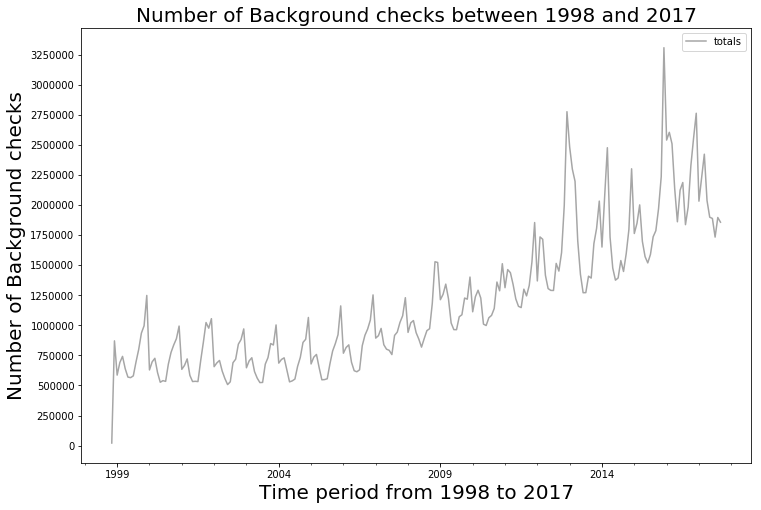

In [23]:
#total guns over time - groupeda by month
guns.groupby('month').sum()[['totals']].plot(figsize = (12,8), color = 'grey', alpha  =0.7)
plt.yticks(np.arange(0,3500000,step = 250000))
plt.xlabel('Time period from 1998 to 2017',size = 20)
plt.ylabel('Number of Background checks',size = 20)
plt.title('Number of Background checks between 1998 and 2017',size = 20);

>Seems like there's a seasonal and upward trend to total permits and gun sales (in US). Additionally, background checks have increased over 160% from 1.25 million in 1999 to 3.25 million in 2017. 

#### A look at gun sales and permits separately and see what's contributing to this high growth

In [24]:
guns.head()

state   permit  permit_recheck  handgun  long_gun   other  \
month                                                                        
2017-09-01     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
2017-09-01      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2017-09-01     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
2017-09-01    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
2017-09-01  California  57839.0             0.0  37165.0   24581.0  2984.0   

            multiple  admin  prepawn_handgun  prepawn_long_gun  prepawn_other  \
month                                                                           
2017-09-01       317    0.0             15.0              21.0            2.0   
2017-09-01       160    0.0              5.0               2.0            0.0   
2017-09-01       631    0.0             13.0               6.0            0.0   
2017-09-01       366   51.0             12.0              13.0            0.0   
2017-09-01         0    0.0              0.0               0.0            0.0   

            redemption_handgun  redemption_long_gun  redemption_other  \
month                                                                   
2017-09-01              1378.0               1262.0               1.0   
2017-09-01               200.0                154.0               2.0   
2017-09-01              1474.0                748.0               3.0   
2017-09-01              1296.0               1824.0               4.0   
2017-09-01               535.0                397.0               5.0   

            returned_handgun  returned_long_gun  returned_other  \
month                                                             
2017-09-01               0.0                0.0             0.0   
2017-09-01              28.0               30.0             0.0   
2017-09-01              82.0                5.0             0.0   
2017-09-01               0.0                0.0             0.0   
2017-09-01               0.0                0.0             0.0   

            rentals_handgun  rentals_long_gun  private_sale_handgun  \
month                                                                 
2017-09-01              0.0               0.0                   9.0   
2017-09-01              0.0               0.0                  17.0   
2017-09-01              0.0               0.0                  38.0   
2017-09-01              0.0               0.0                  13.0   
2017-09-01              0.0               0.0                   0.0   

            private_sale_long_gun  private_sale_other  \
month                                                   
2017-09-01                   16.0                 3.0   
2017-09-01                   24.0                 1.0   
2017-09-01                   12.0                 2.0   
2017-09-01                   23.0                 0.0   
2017-09-01                    0.0                 0.0   

            return_to_seller_handgun  return_to_seller_long_gun  \
month                                                             
2017-09-01                       0.0                        0.0   
2017-09-01                       0.0                        0.0   
2017-09-01                       0.0                        0.0   
2017-09-01                       0.0                        2.0   
2017-09-01                       0.0                        0.0   

            return_to_seller_other  totals  
month                                       
2017-09-01                     3.0   32019  
2017-09-01                     0.0    6303  
2017-09-01                     0.0   28394  
2017-09-01                     1.0   17747  
2017-09-01                     0.0  123506

Text(0.5, 1.0, 'Total Number of background Checks by Month')

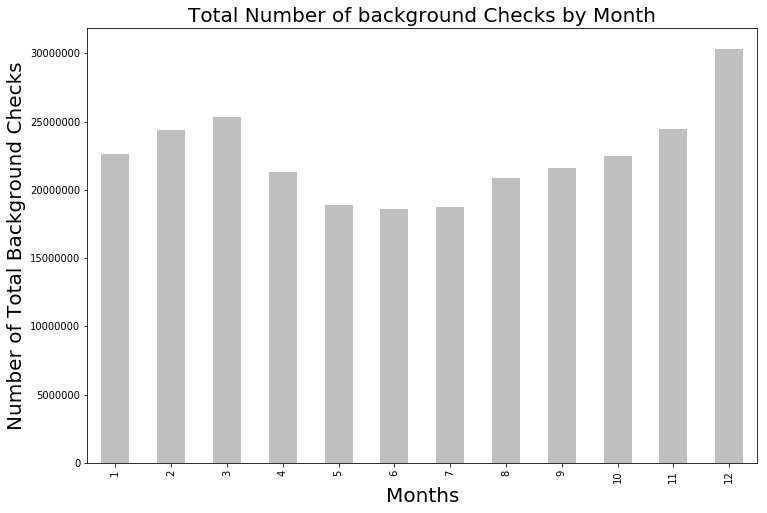

In [25]:
guns.groupby(pd.DatetimeIndex(guns.index).month).sum()['totals'].plot(kind = 'bar', color = 'grey', alpha = 0.5, figsize = (12,8))
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Months', size = 20)
plt.ylabel('Number of Total Background Checks', size = 20)
plt.title('Total Number of background Checks by Month', size = 20)

>December (month 12) definitely has a much higher count of background checks. Perhaps Black Friday and Christmas have an effect on elevated numbers. June and July have the lowest number of sales out of all the months.

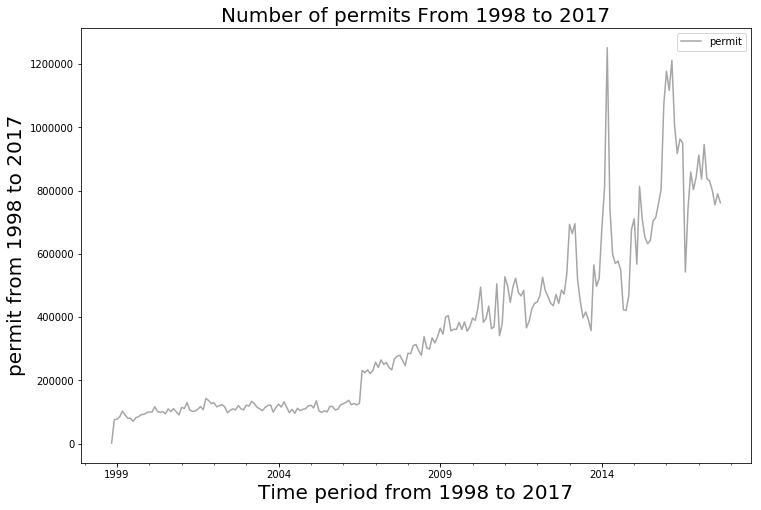

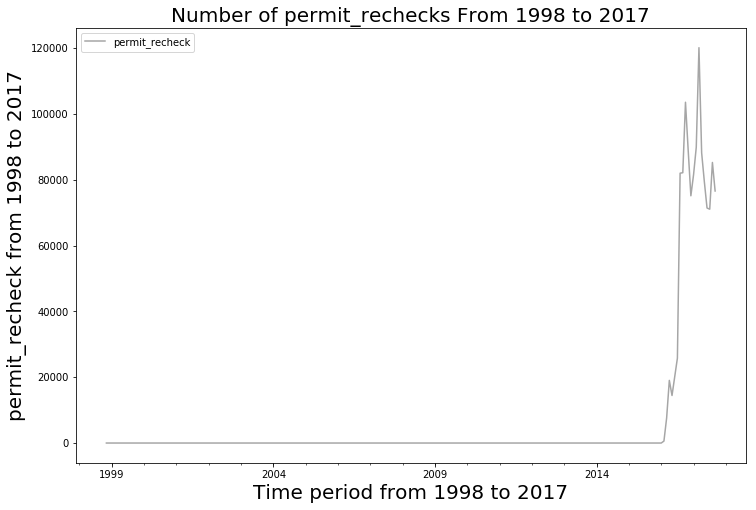

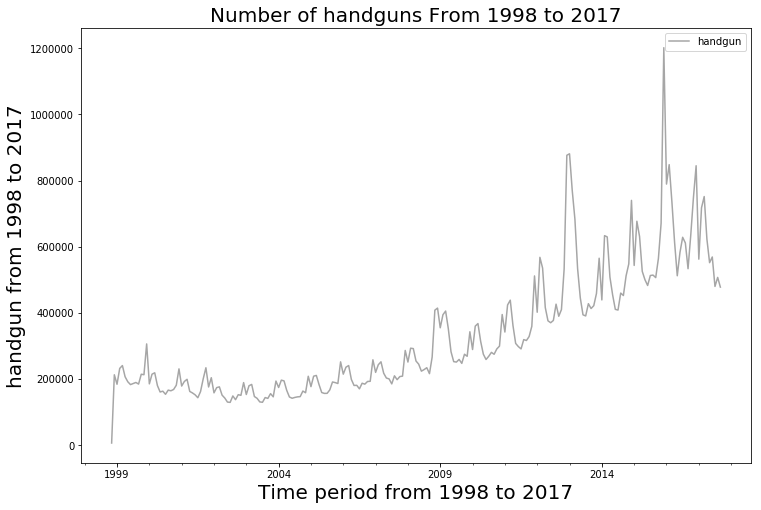

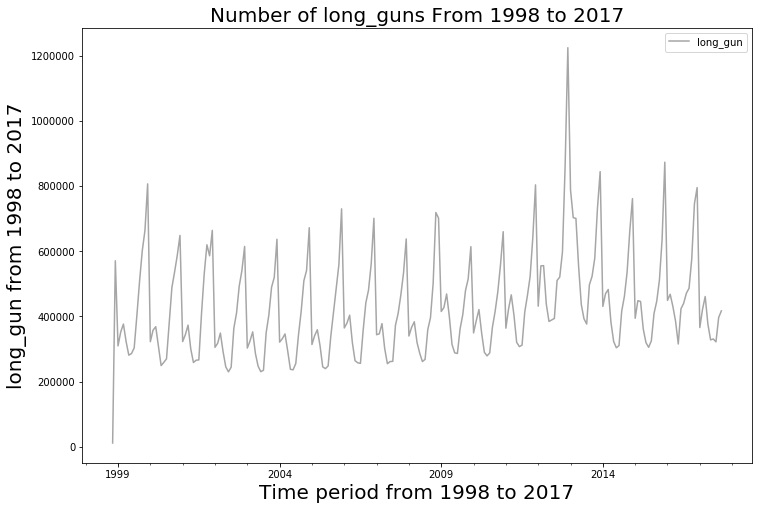

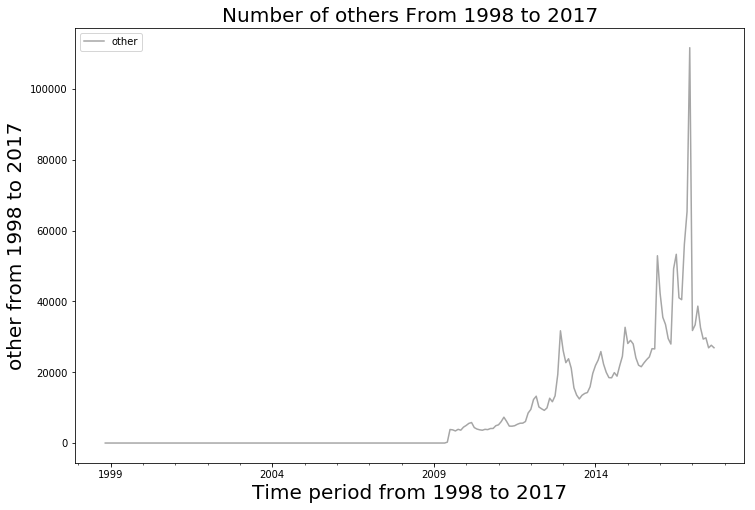

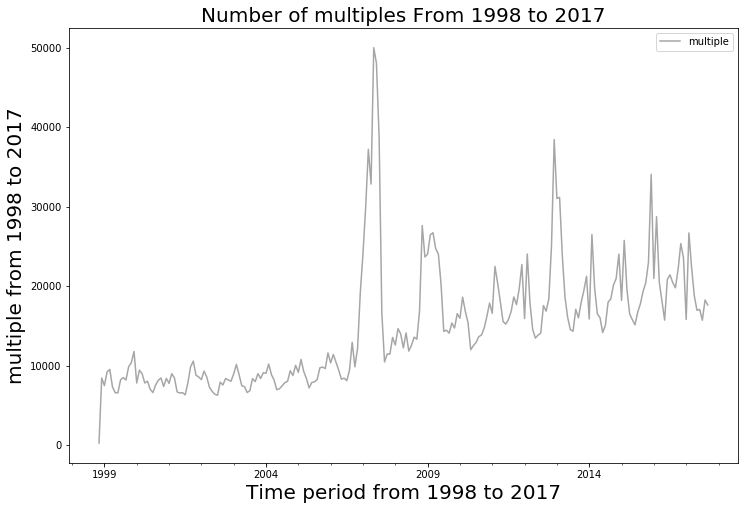

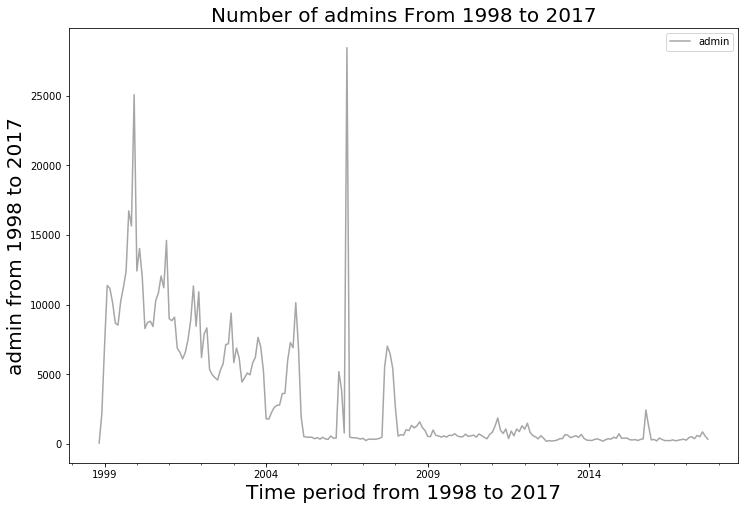

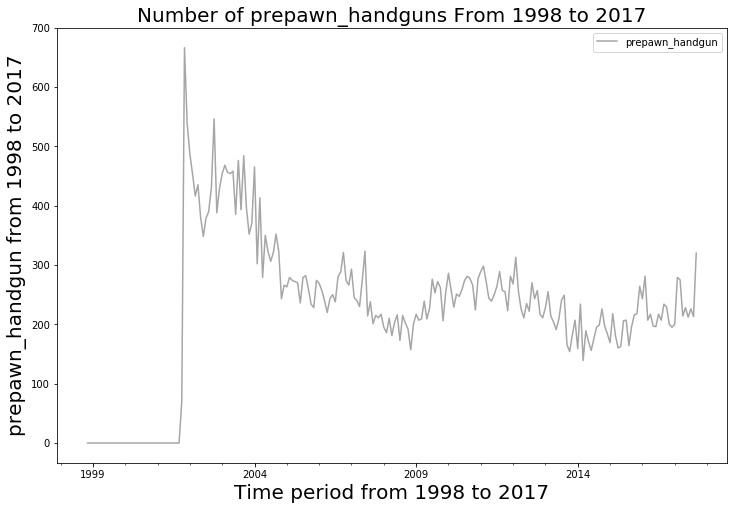

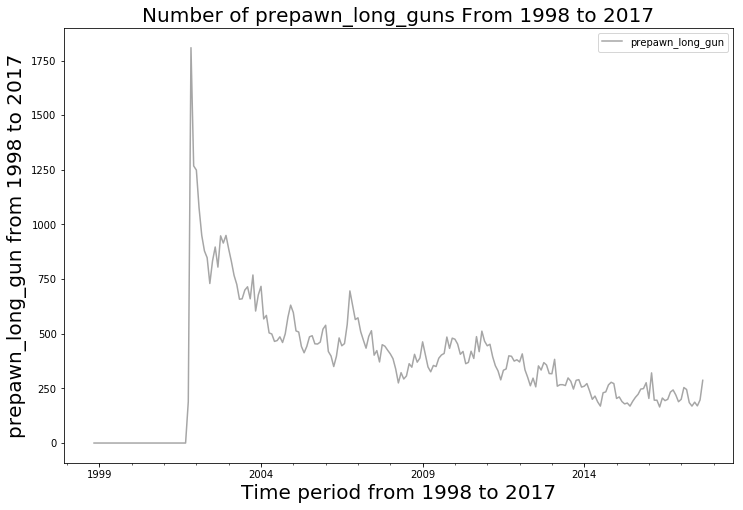

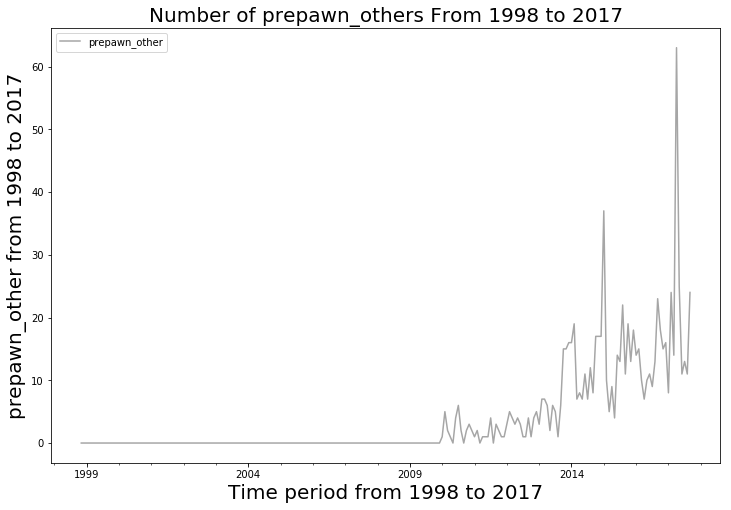

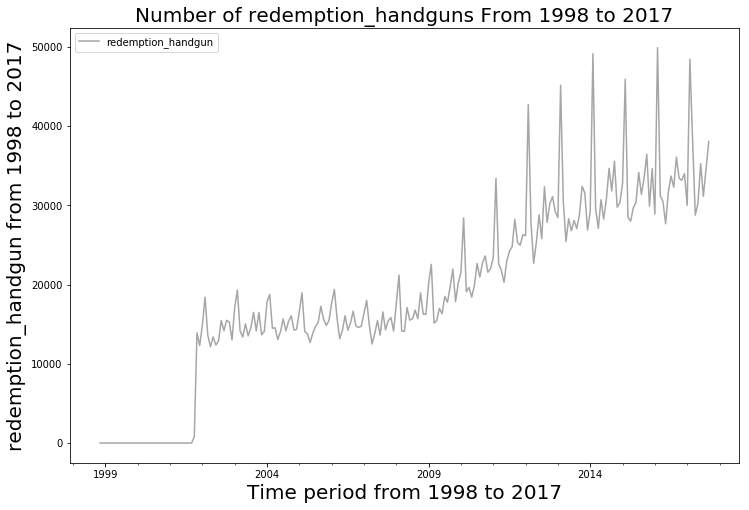

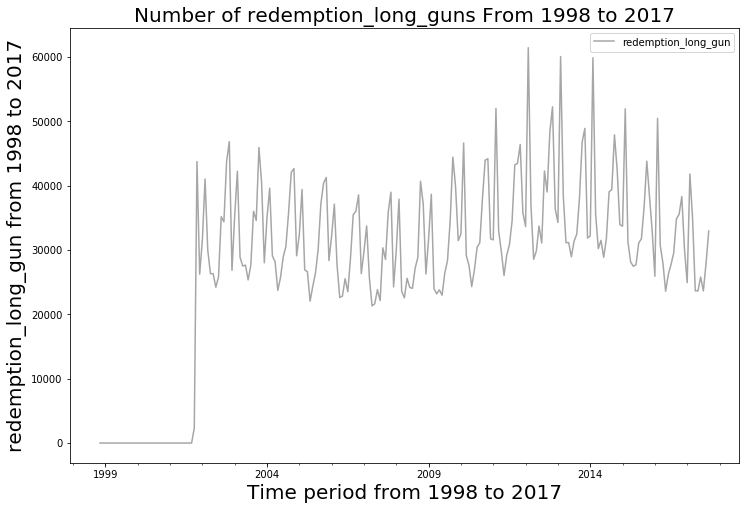

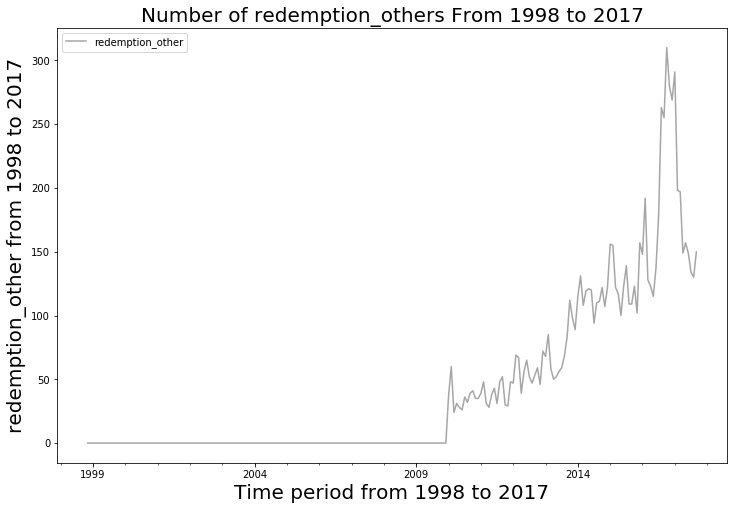

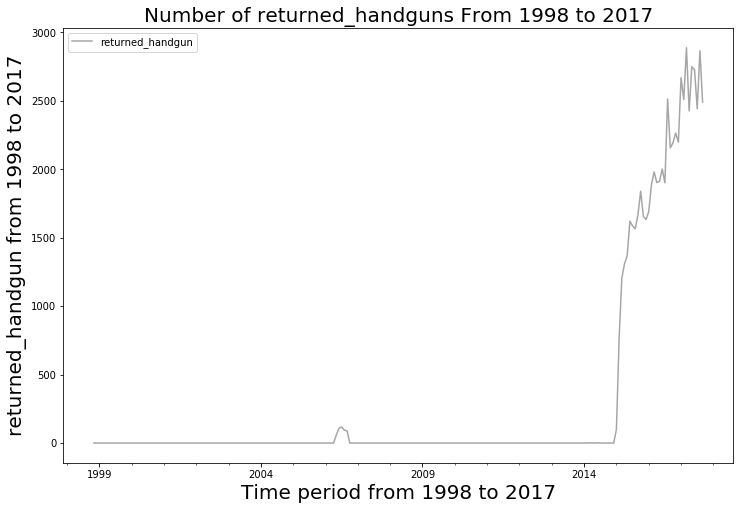

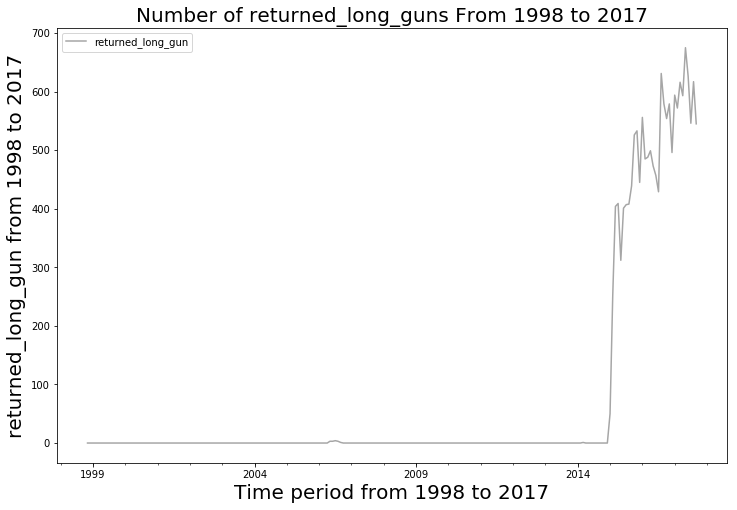

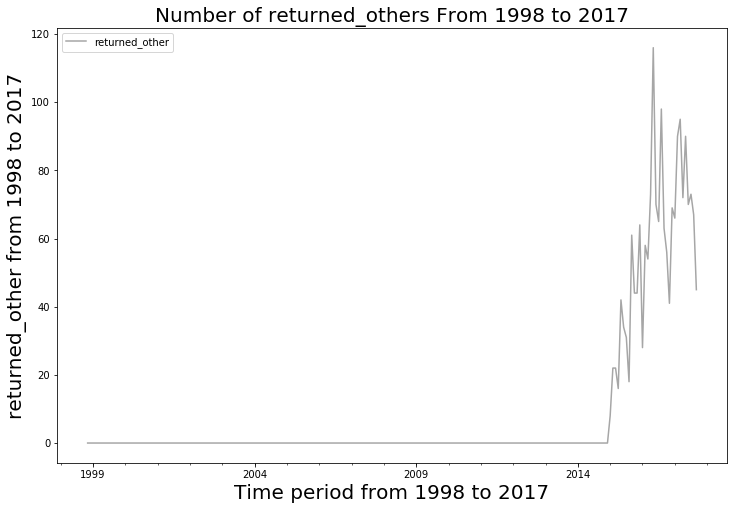

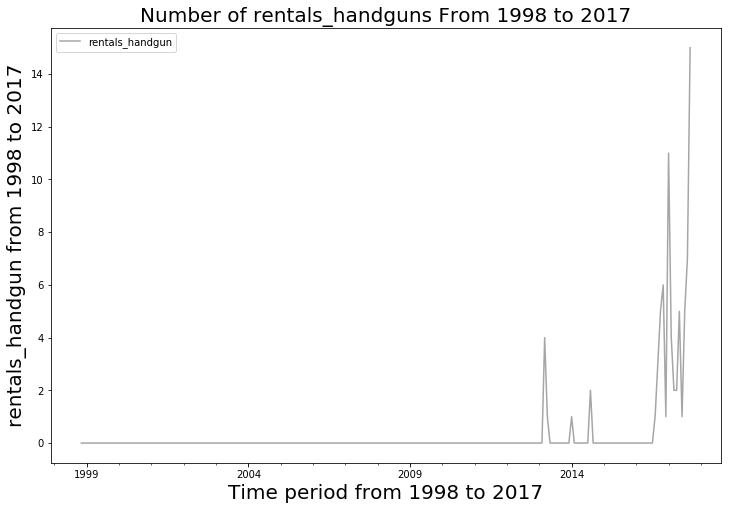

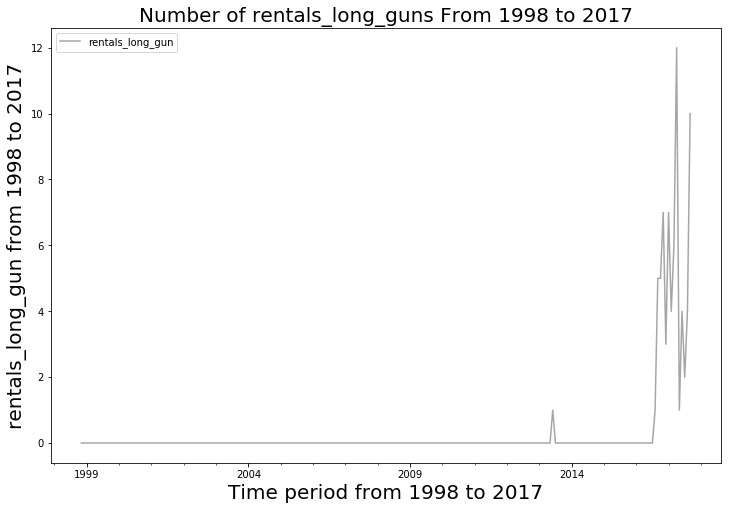

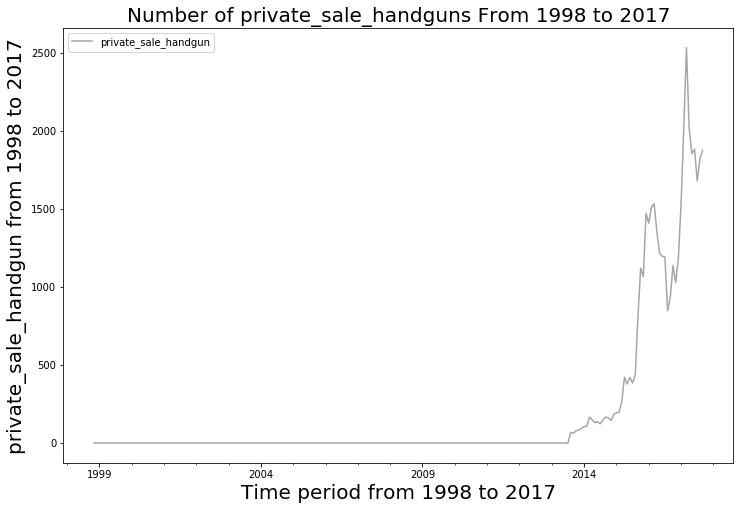

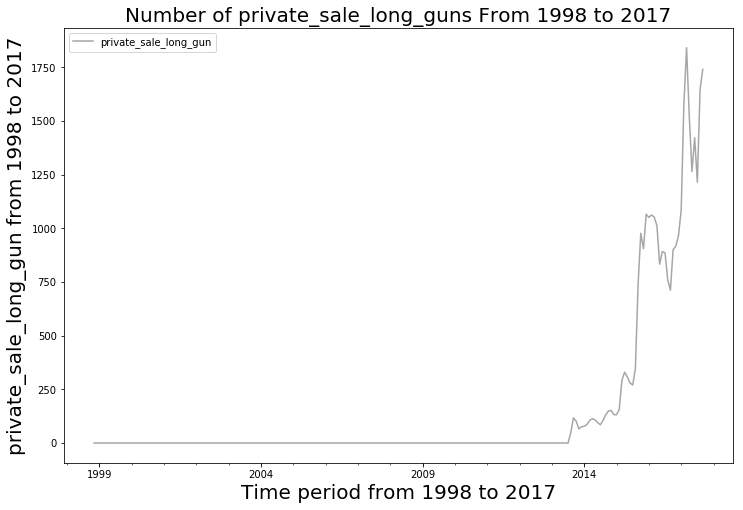

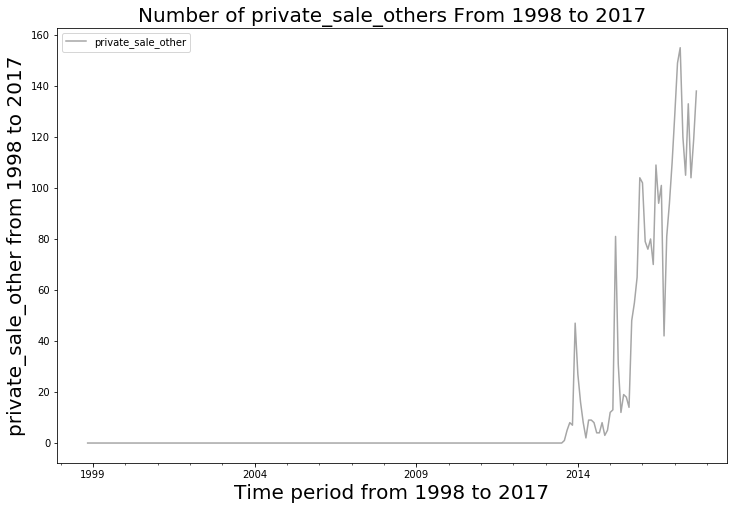

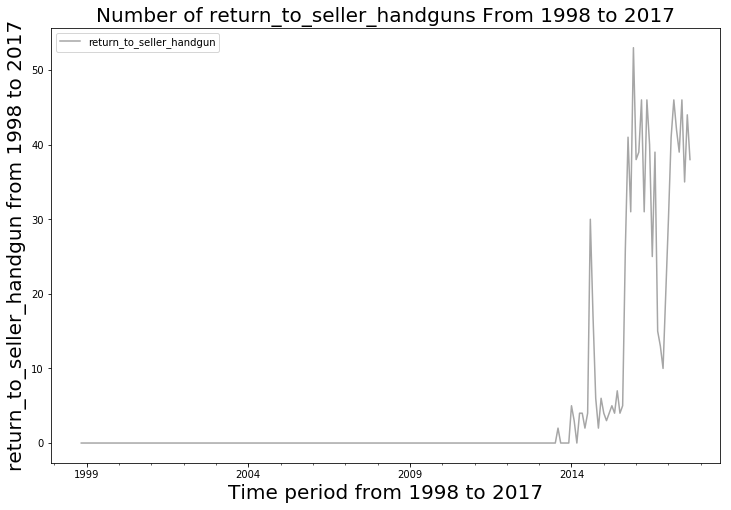

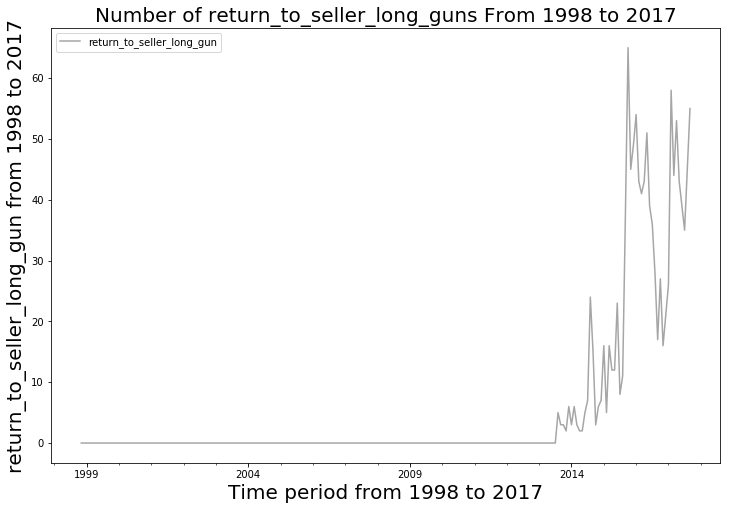

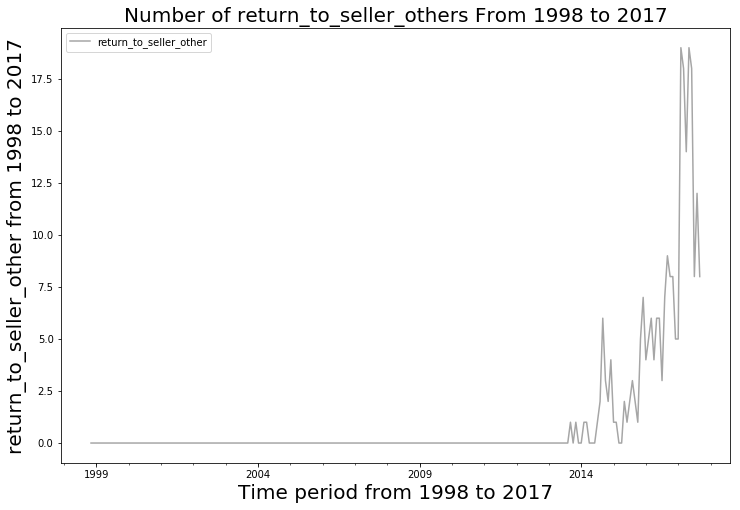

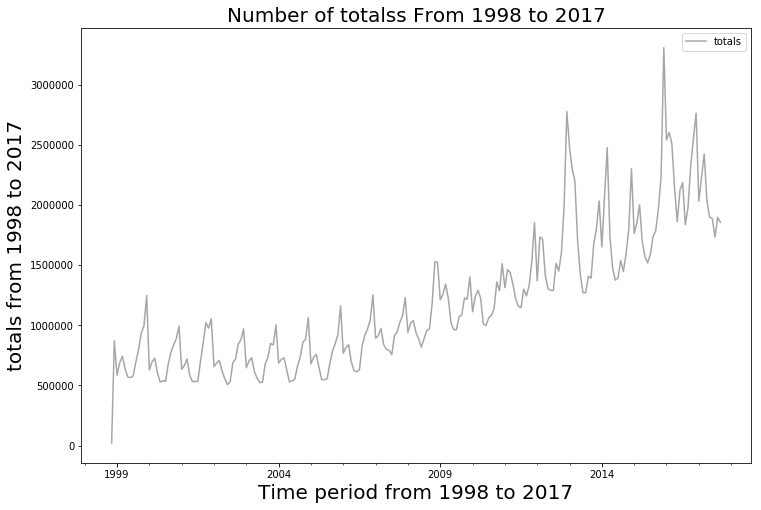

In [26]:
#plot all guns columns by month
for i in guns.columns.drop('state').tolist():
    guns[[i]].groupby('month').sum().plot(figsize = (12,8), color = 'grey', alpha = 0.7)
    plt.ylabel(str(i) + ' from 1998 to 2017', size = 20)
    plt.title('Number of '+ str(i) + 's From 1998 to 2017', size = 20)
    plt.xlabel('Time period from 1998 to 2017', size = 20)
    plt.show()

> The most significant columns for this analysis are permits, handguns, long guns and multiple and totals. Most other columns have very limited data.

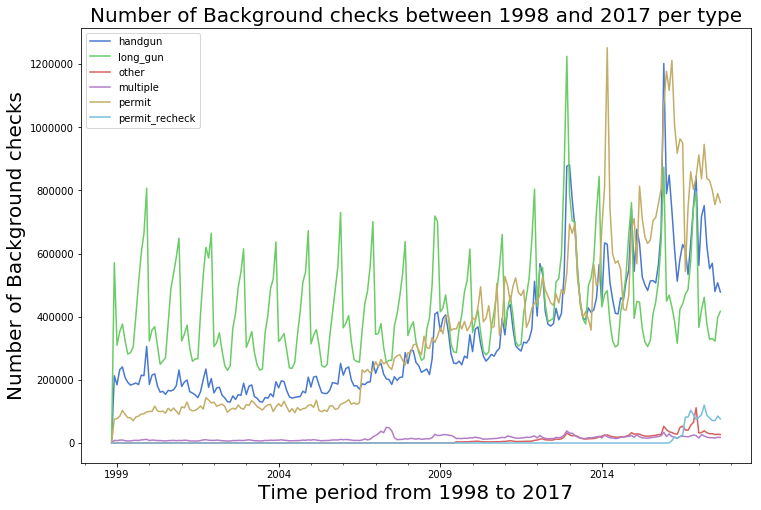

In [27]:
#group by time, and sum all columns. Select only guns and permits columns
guns.groupby('month').sum()[['handgun', 'long_gun', 'other',
       'multiple', 'permit','permit_recheck']].plot(figsize = (12,8))
plt.xlabel('Time period from 1998 to 2017',size = 20)
plt.ylabel('Number of Background checks',size = 20)
plt.title('Number of Background checks between 1998 and 2017 per type',size = 20);

>Long guns licenses, handguns licences and permits have been increasing. To get a better understand, let's look at a rolling mean trend for long guns, hand guns and permits excluding seasonality

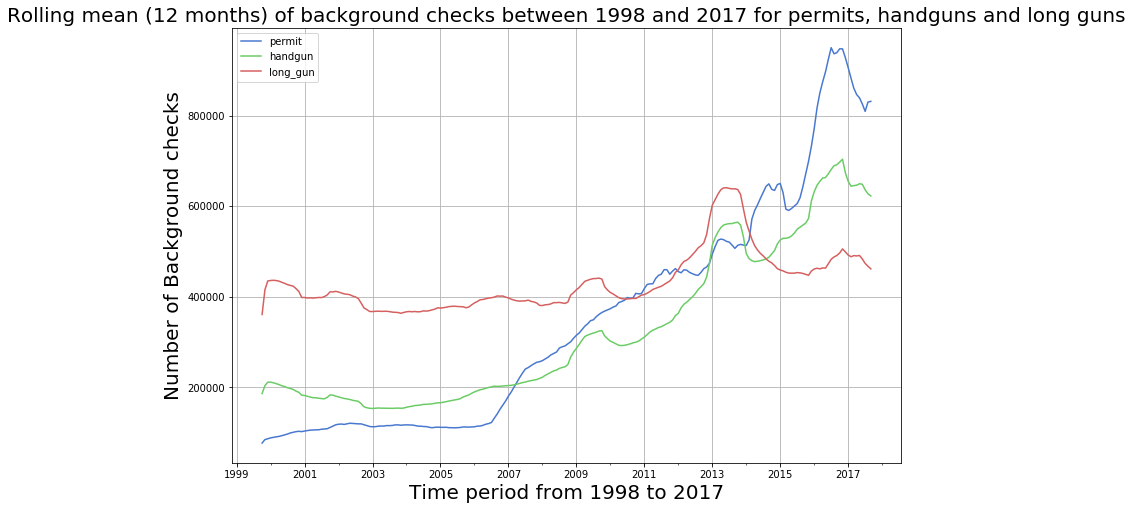

In [28]:
#rolling mean plot of permits, long guns and hand guns
pd.rolling_mean(guns.groupby('month').sum()[['permit','handgun', 'long_gun']], window = 12).plot(figsize = (12,8))
plt.xlabel('Time period from 1998 to 2017',size = 20)
plt.ylabel('Number of Background checks',size = 20)
plt.grid()
plt.title('Rolling mean (12 months) of background checks between 1998 and 2017 for permits, handguns and long guns',size = 20);

>Permit and handgun sales have been on a rise since early 2000s, but there was a huge spike in all categories in 2013. Since 2013 there's been a sudden increase in permits and handguns, while long guns have regressed.

## 2. Which states have seen the most increase in gun sales?

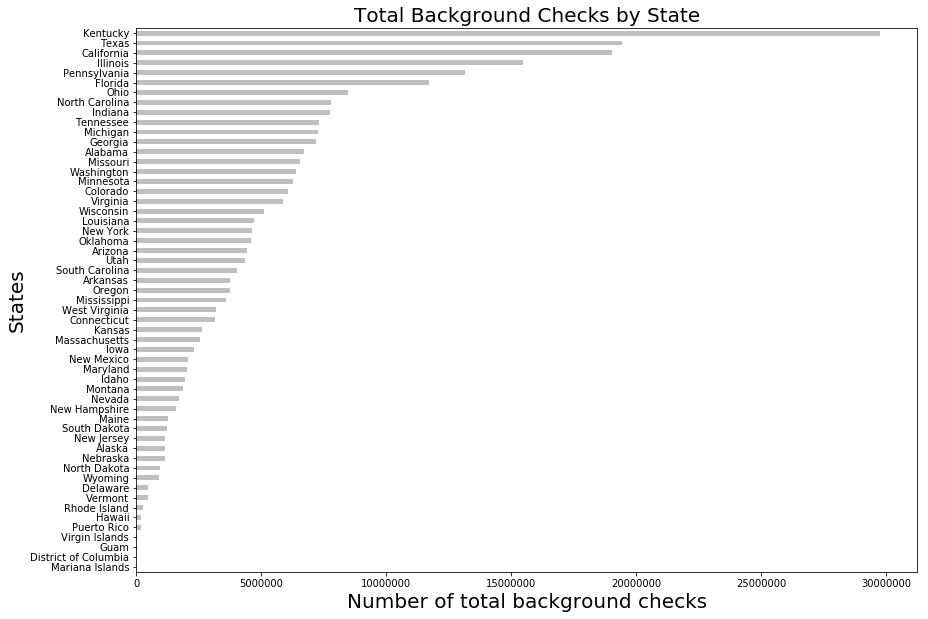

In [29]:
fig, ax = plt.subplots(1,1)
guns.groupby('state')['totals'].sum().sort_values().plot(kind = 'barh', figsize = (14,10), color = 'grey', alpha = 0.5, ax = ax)
plt.xlabel('Number of total background checks',size = 20)
plt.ylabel('States',size = 20)
plt.title('Total Background Checks by State',size = 20)
plt.ticklabel_format(style='plain', axis='x');


### After some research on Permit and Permit Rechecks, many studies including <a href="http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf">Small Arms Survey</a></li>, excluded all instances of permits because of irregularities between state mandated permits and rechecks. For example, Kentucky runs permit check every month, and Utah every 90 days to ensure all their constituents who have permits, haven't been convicted of a felony recently. This leads to an overestimation of gun sales for these states. Due to such irregularities in data, and to get a better representation of the guns sales data (much like other studies) I decided to only keep `handgun`, `long gun`, `other`, and `multiple` columns.

In [30]:
#guns only to include state, handgun, long gun, other and multiple columns
guns = guns[['state', 'handgun', 'long_gun', 'other','multiple']]

In [31]:
#since multiple represents 2 guns or more - so each count times 2 to represent gun sales
guns['multiple'] = guns['multiple']*2

In [32]:
#add up all the columns to create a new total guns column
guns['total_guns'] = guns.iloc[:, -5:-1].sum(axis = 1)

In [33]:
#look at the first 3 rows
guns.head(3)

state  handgun  long_gun  other  multiple  total_guns
month                                                              
2017-09-01  Alabama   5734.0    6320.0  221.0       634     12275.0
2017-09-01   Alaska   2320.0    2930.0  219.0       320      5469.0
2017-09-01  Arizona  11063.0    7946.0  920.0      1262     19929.0

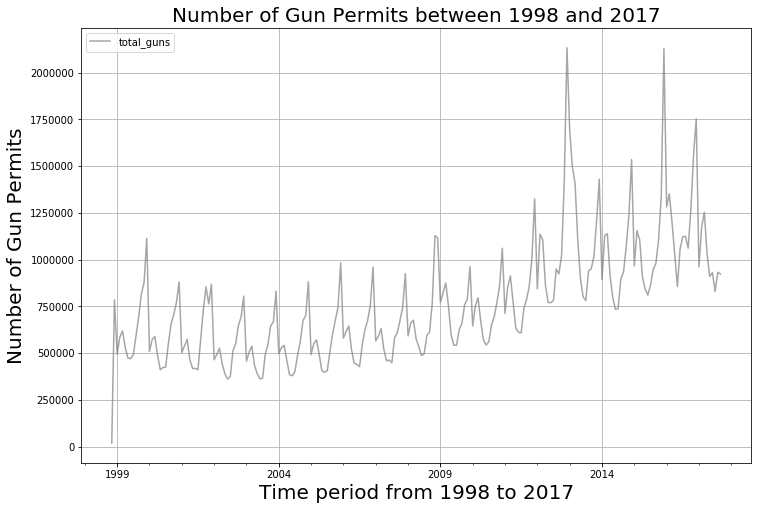

In [34]:
#overall trend of total gun permits only
guns.groupby('month').sum()[['total_guns']].plot(figsize = (12,8), color = 'grey', alpha  =0.7)
plt.yticks(np.arange(0,2250000,step = 250000))
plt.xlabel('Time period from 1998 to 2017',size = 20)
plt.ylabel('Number of Gun Permits',size = 20)
plt.title('Number of Gun Permits between 1998 and 2017',size = 20)
plt.grid();

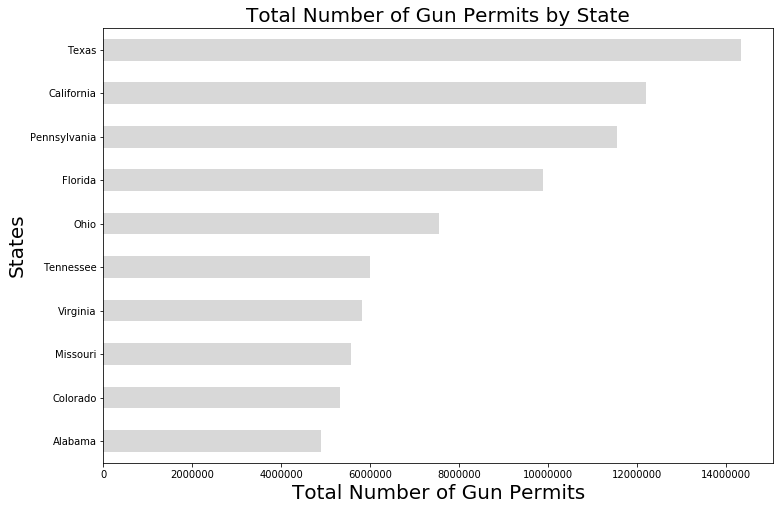

In [35]:
#states with highest total guns count - handguns, long guns, multiple and other guns
fig, ax = plt.subplots(1,1, figsize = (12,8))
#grouby data by state and total guns
guns.groupby('state')['total_guns'].sum().sort_values().tail(10).plot(kind = 'barh',ax = ax, color = 'grey', alpha = 0.3)

plt.xlabel('Total Number of Gun Permits',size = 20)
plt.ylabel('States',size = 20)
plt.title('Total Number of Gun Permits by State',size = 20)
plt.ticklabel_format(style='plain', axis='x');

>Texas, California and Pennsylvania, Florida and Ohio are in the top 5 states with the most guns sales

In [36]:
#list of top 5 states with highest permits
states = guns.groupby('state')['total_guns'].sum().sort_values(ascending = False).head(5).index

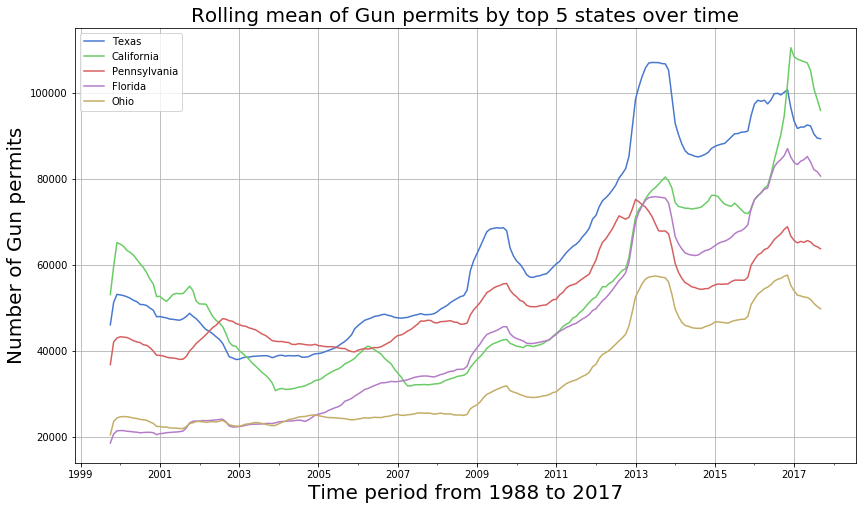

In [37]:
#lets take quick look at how these top 5 states have tracked over time
fig, ax = plt.subplots(figsize = (14,8))
for i in states:
    pd.rolling_mean(guns[guns['state'] == i].groupby('month')['total_guns'].sum(), window = 12).plot(ax = ax, label = i)
    plt.legend()
    plt.xlabel('Time period from 1988 to 2017',size = 20)
    plt.ylabel('Number of Gun permits',size = 20)
    plt.title('Rolling mean of Gun permits by top 5 states over time',size = 20)
    plt.grid()

>Texas has had the fastest growth followed by California and Florida since 2005. Sales have doubled in four out of five states (TX, CA, PN, FL) between 2005 and 2014. Texas has seen a over 170% increase in gun sales since 2005.

## 3. Growth in gun sales per capita per state? (with population increase)

In [38]:
#pivot guns with time as index and each state as columns. For values, use total_guns
guns_pivot = guns.groupby(['state','month']).sum().reset_index().pivot_table(values = 'total_guns', index = 'month', columns = 'state', aggfunc= 'sum')
guns_pivot.head(5)

state       Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
month                                                                  
1998-11-01   1052.0   139.0    369.0     578.0      1667.0     597.0   
1998-12-01  35238.0  3781.0  15063.0   20985.0     60412.0   22561.0   
1999-01-01  17827.0  2223.0  10876.0   11652.0     49642.0   18820.0   
1999-02-01  20284.0  2351.0  12408.0   15037.0     51756.0   21412.0   
1999-03-01  19142.0  3140.0  12509.0   13429.0     60736.0   16621.0   

state       Connecticut  Delaware  District of Columbia  Florida  Georgia  \
month                                                                       
1998-11-01         54.0      54.0                   0.0    762.0     50.0   
1998-12-01       3953.0    2071.0                   0.0  30028.0   2903.0   
1999-01-01       3199.0    1121.0                   1.0  17846.0  12212.0   
1999-02-01       3538.0    1065.0                   3.0  20451.0  21853.0   
1999-03-01       4174.0    1303.0                   2.0  21591.0  19528.0   

state       Guam  Hawaii   Idaho  Illinois  Indiana    Iowa   Kansas  \
month                                                                  
1998-11-01   0.0     1.0   173.0      18.0    344.0   168.0    390.0   
1998-12-01   9.0    29.0  6733.0   17239.0  22156.0  6636.0  11846.0   
1999-01-01   2.0     0.0  4660.0   13120.0  15329.0  2587.0   7856.0   
1999-02-01   6.0     0.0  5036.0   16194.0  15955.0  2752.0   7505.0   
1999-03-01   6.0     0.0  5903.0   18013.0  16928.0  3039.0   8805.0   

state       Kentucky  Louisiana   Maine  Mariana Islands  Maryland  \
month                                                                
1998-11-01     830.0      793.0    95.0              0.0     259.0   
1998-12-01   30619.0    26639.0  3963.0              0.0    7099.0   
1999-01-01   17572.0    12680.0  2289.0              0.0    3684.0   
1999-02-01   21835.0    13809.0  2684.0              0.0    3665.0   
1999-03-01   20341.0    14016.0  3309.0              0.0    3929.0   

state       Massachusetts  Michigan  Minnesota  Mississippi  Missouri  \
month                                                                   
1998-11-01           43.0     446.0      307.0        777.0     574.0   
1998-12-01         1394.0   20054.0     9765.0      25118.0   23391.0   
1999-01-01          836.0    8375.0     4785.0      12283.0   13322.0   
1999-02-01         1005.0   10084.0     6643.0      15669.0   16659.0   
1999-03-01         1412.0   12424.0     9808.0      13693.0   17332.0   

state       Montana  Nebraska  Nevada  New Hampshire  New Jersey  New Mexico  \
month                                                                          
1998-11-01    199.0      97.0   151.0           54.0        73.0       207.0   
1998-12-01   6121.0    4627.0  6137.0         2376.0      3695.0      8690.0   
1999-01-01   4190.0    1775.0  4581.0         1450.0      2458.0      6537.0   
1999-02-01   4865.0    1658.0  4684.0         1449.0      2571.0      7519.0   
1999-03-01   5957.0    1801.0  5160.0         1860.0      3219.0      8145.0   

state       New York  North Carolina  North Dakota     Ohio  Oklahoma  \
month                                                                   
1998-11-01     319.0           782.0          58.0    936.0     620.0   
1998-12-01   13288.0         26351.0        2361.0  31107.0   19185.0   
1999-01-01    6209.0         12971.0        1327.0  16445.0   11848.0   
1999-02-01    7339.0         15143.0        1589.0  23078.0   14319.0   
1999-03-01    9070.0         13855.0        2045.0  24452.0   13033.0   

state        Oregon  Pennsylvania  Puerto Rico  Rhode Island  South Carolina  \
month                                                                          
1998-11-01    339.0          13.0          2.0          36.0             6.0   
1998-12-01  13585.0       45275.0        502.0        1005.0          9492.0   
1999-01-01   9480.0       30261.0        398.0        

In [39]:
#reduce the df to first entry in 1999 and last entry in 2017 to calculate growth% in sales since NICS started gathering data
guns_pivot = guns_pivot.iloc[[2,-1],:]
guns_pivot.head(2)


state       Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
month                                                                  
1999-01-01  17827.0  2223.0  10876.0   11652.0     49642.0   18820.0   
2017-09-01  12275.0  5469.0  19929.0   10575.0     64730.0   30206.0   

state       Connecticut  Delaware  District of Columbia  Florida  Georgia  \
month                                                                       
1999-01-01       3199.0    1121.0                   1.0  17846.0  12212.0   
2017-09-01       7101.0    3018.0                  60.0  59467.0  19230.0   

state        Guam  Hawaii   Idaho  Illinois  Indiana    Iowa  Kansas  \
month                                                                  
1999-01-01    2.0     0.0  4660.0   13120.0  15329.0  2587.0  7856.0   
2017-09-01  131.0     0.0  8486.0   28491.0  28548.0  2818.0  9849.0   

state       Kentucky  Louisiana   Maine  Mariana Islands  Maryland  \
month                                                                
1999-01-01   17572.0    12680.0  2289.0              0.0    3684.0   
2017-09-01   15908.0    22703.0  7425.0             15.0    8454.0   

state       Massachusetts  Michigan  Minnesota  Mississippi  Missouri  \
month                                                                   
1999-01-01          836.0    8375.0     4785.0      12283.0   13322.0   
2017-09-01         8006.0   19709.0    17885.0      12501.0   32438.0   

state       Montana  Nebraska  Nevada  New Hampshire  New Jersey  New Mexico  \
month                                                                          
1999-01-01   4190.0    1775.0  4581.0         1450.0      2458.0      6537.0   
2017-09-01   7413.0    2110.0  6752.0         7790.0      7165.0     10170.0   

state       New York  North Carolina  North Dakota     Ohio  Oklahoma  \
month                                                                   
1999-01-01    6209.0         12971.0        1327.0  16445.0   11848.0   
2017-09-01   25603.0         13232.0        4377.0  37285.0   18630.0   

state        Oregon  Pennsylvania  Puerto Rico  Rhode Island  South Carolina  \
month                                                                          
1999-01-01   9480.0       30261.0        398.0         814.0          9428.0   
2017-09-01  23330.0       53095.0        759.0        1596.0         13990.0   

state       South Dakota  Tennessee    Texas    Utah  Vermont  Virgin Islands  \
month                                                                           
1999-01-01        1379.0    18277.0  44302.0  4977.0   1032.0             0.0   
2017-09-01        6329.0    34007.0  81303.0  7012.0   2957.0             8.0   

state       Virginia  Washington  West Virginia  Wisconsin  Wyoming  
month                                                                
1999-01-01   13854.0      7671.0         8107.0     7772.0   2069.0  
2017-09-01   35851.0     26463.0        11581.0    24663.0   3413.0

In [40]:
#growth% per state
guns_pivot = guns_pivot.append((guns_pivot.ix[1] - guns_pivot.ix[0])*100/guns_pivot.ix[0], ignore_index= True)
guns_pivot.head()

state       Alabama       Alaska       Arizona      Arkansas    California  \
0      17827.000000  2223.000000  10876.000000  11652.000000  49642.000000   
1      12275.000000  5469.000000  19929.000000  10575.000000  64730.000000   
2        -31.143771   146.018893     83.238323     -9.243048     30.393618   

state      Colorado  Connecticut     Delaware  District of Columbia  \
0      18820.000000  3199.000000  1121.000000                   1.0   
1      30206.000000  7101.000000  3018.000000                  60.0   
2         60.499469   121.975617   169.223907                5900.0   

state       Florida       Georgia    Guam  Hawaii        Idaho      Illinois  \
0      17846.000000  12212.000000     2.0     0.0  4660.000000  13120.000000   
1      59467.000000  19230.000000   131.0     0.0  8486.000000  28491.000000   
2        233.223131     57.468064  6450.0     NaN    82.103004    117.157012   

state      Indiana         Iowa       Kansas      Kentucky     Louisiana  \
0      15329.00000  2587.000000  7856.000000  17572.000000  12680.000000   
1      28548.00000  2818.000000  9849.000000  15908.000000  22703.000000   
2         86.23524     8.929262    25.369145     -9.469611     79.045741   

state        Maine  Mariana Islands     Maryland  Massachusetts      Michigan  \
0      2289.000000         0.000000  3684.000000     836.000000   8375.000000   
1      7425.000000        15.000000  8454.000000    8006.000000  19709.000000   
2       224.377457              inf   129.478827     857.655502    135.331343   

state     Minnesota   Mississippi      Missouri      Montana     Nebraska  \
0       4785.000000  12283.000000  13322.000000  4190.000000  1775.000000   
1      17885.000000  12501.000000  32438.000000  7413.000000  2110.000000   
2        273.772205      1.774811    143.491968    76.921241    18.873239   

state       Nevada  New Hampshire   New Jersey    New Mexico      New York  \
0      4581.000000    1450.000000  2458.000000   6537.000000   6209.000000   
1      6752.000000    7790.000000  7165.000000  10170.000000  25603.000000   
2        47.391399     437.241379   191.497152     55.575952    312.353036   

state  North Carolina  North Dakota          Ohio      Oklahoma        Oregon  \
0        12971.000000   1327.000000  16445.000000  11848.000000   9480.000000   
1        13232.000000   4377.000000  37285.000000  18630.000000  23330.000000   
2            2.012181    229.841748    126.725448     57.241729    146.097046   

state  Pennsylvania  Puerto Rico  Rhode Island  South Carolina  South Dakota  \
0      30261.000000   398.000000    814.000000     9428.000000   1379.000000   
1      53095.000000   759.000000   1596.000000    13990.000000   6329.000000   
2         75.456859    90.703518     96.068796       48.387781    358.955765   

state     Tennessee         Texas         Utah      Vermont  Virgin Islands  \
0      18277.000000  44302.000000  4977.000000  1032.000000        0.000000   
1      34007.000000  81303.000000  7012.000000  2957.000000        8.000000   
2         86.064453     83.519931    40.888085   186.531008             inf   

state      Virginia   Washington  West Virginia     Wisconsin      Wyoming  
0      13854.000000   7671.00000    8107.000000   7772.000000  2069.000000  
1      35851.000000  26463.00000   11581.000000  24663.000000  3413.000000  
2        158.777248    244.97458      42.851856    217.331446    64.958917

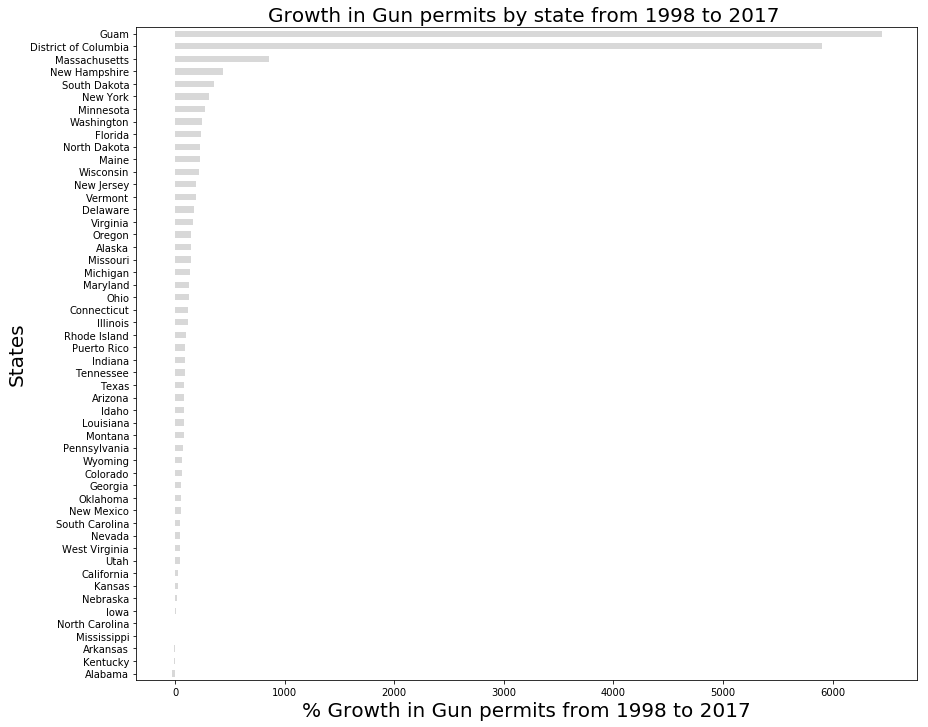

In [41]:
#plot guns sales growth percentage by state
guns_pivot.ix[2].sort_values().head(-3).plot(kind = 'barh',color = 'grey',alpha = 0.3,figsize = (14,12))
plt.xlabel('% Growth in Gun permits from 1998 to 2017',size = 20)
plt.ylabel('States',size = 20)
plt.title('Growth in Gun permits by state from 1998 to 2017 ',size = 20);

>Growth in DC and Guam is approximately 6000% and 7000% respectively. This is overshadowing the rest of the states. Let's take these two out for a deeper dive

In [42]:
#exclude Guam and DC
cols = guns_pivot.columns.drop(['Guam','District of Columbia'])

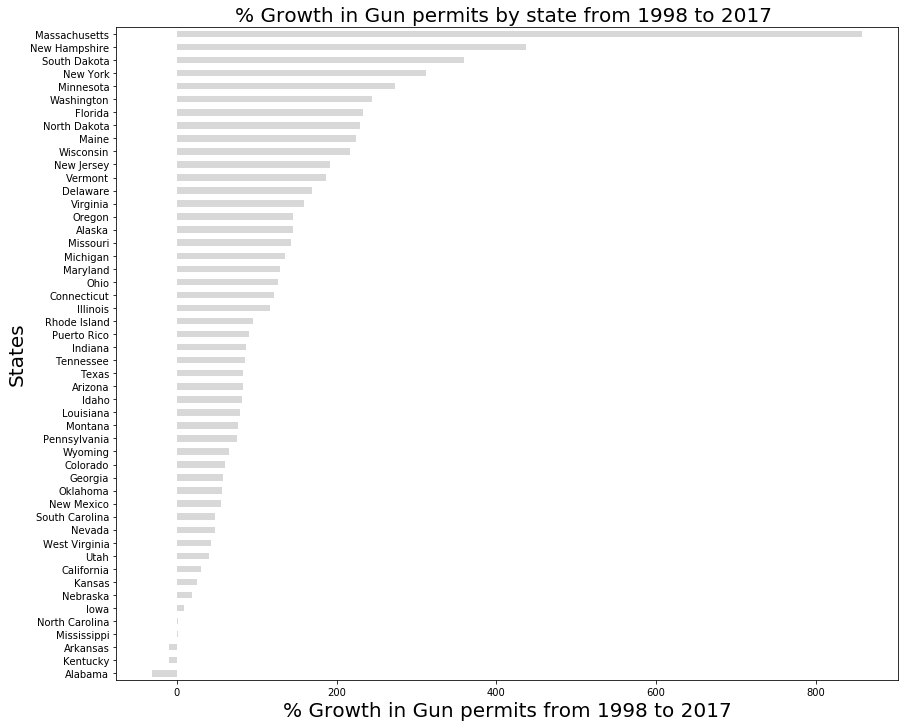

In [43]:
#remove DC and Guam, and plot
fig, ax = plt.subplots(1,1)
guns_pivot.ix[2][cols].sort_values().head(-3).plot(kind = 'barh',color = 'grey',
                                alpha = 0.3, figsize = (14,12),ax = ax)
plt.xlabel('% Growth in Gun permits from 1998 to 2017',size = 20)
plt.ylabel('States',size = 20)
plt.title('% Growth in Gun permits by state from 1998 to 2017 ',size = 20);

>Massachusetts has the highest growth at 800%, followed by New Hampshire at 400% and South Dakota at 390%. Alabama, Kentucky and Arkansas have seen a decline. 

#### To get a more accurate representation of growth in gun sales over time, let's look at guns growth per capita 

## Census data

In [44]:
guns.head(3)

state  handgun  long_gun  other  multiple  total_guns
month                                                              
2017-09-01  Alabama   5734.0    6320.0  221.0       634     12275.0
2017-09-01   Alaska   2320.0    2930.0  219.0       320      5469.0
2017-09-01  Arizona  11063.0    7946.0  920.0      1262     19929.0

In [45]:
census.head(3)

Fact    state  all_firms__2012  \
0     Alabama         374153.0   
1      Alaska          68032.0   
2     Arizona         499926.0   

Fact  american_indian_and_alaska_native_alone__percent__july_1__2016___(v2016)  \
0                                                   0.7                          
1                                                  15.2                          
2                                                   5.4                          

Fact  asian_alone__percent__july_1__2016___(v2016)  \
0                                              1.4   
1                                              6.3   
2                                              3.4   

Fact  bachelor's_degree_or_higher__percent_of_persons_age_25_years+__2011-2015  \
0                                                  23.5                          
1                                                  28.0                          
2                                                  27.5                          

Fact  black_or_african_american_alone__percent__july_1__2016___(v2016)  \
0                                                  26.8                  
1                                                   3.8                  
2                                                   4.9                  

Fact  building_permits__2016  \
0                    15001.0   
1                     1503.0   
2                    35578.0   

Fact  female_persons__percent___july_1__2016___(v2016)  \
0                                                 51.6   
1                                                 47.7   
2                                                 50.3   

Fact  female_persons__percent__april_1__2010  \
0                                       51.5   
1                                       48.0   
2                                       50.3   

Fact  foreign_born_persons__percent__2011-2015  \
0                                          3.5   
1                                          7.4   
2                                         13.5   

Fact  high_school_graduate_or_higher__percent_of_persons_age_25_years+__2011-2015  \
0                                                  84.3                             
1                                                  92.1                             
2                                                  86.0                             

Fact  hispanic_or_latino__percent__july_1__2016___(v2016)  \
0                                                   4.2     
1                                                   7.0     
2                                                  30.9     

Fact  households__2011-2015  housing_units___july_1__2016___(v2016)  \
0                 1848325.0                               2230185.0   
1                  250969.0                                310658.0   
2                 2412212.0                               2961003.0   

Fact  housing_units__april_1__2010  \
0                        2171853.0   
1                         306967.0   
2                        2844526.0   

Fact  in_civilian_labor_force__female__percent_of_population_age_16_years+__2011-2015  \
0                                                  53.0                                 
1                                                  65.0                                 
2                                                  54.5                                 

Fact  in_civilian_labor_force__total__percent_of_population_age_16_years+__2011-2015  \
0                                                  58.0                                
1                                                  67.7                                
2                                                  59.3                                

Fact  land_area_in_square_miles__2010  \
0                            50645.33   
1                           570640.95   
2                           113594.08   

Fact  language_other_than_english_sp

In [46]:
#extract population column from census dataframe for 2010-04-01 and 2016-07-01
census_pop = census[['state', 'population__census__april_1__2010','population_estimates__july_1__2016___(v2016)']]
census_pop.head(2)

Fact    state  population__census__april_1__2010  \
0     Alabama                          4779736.0   
1      Alaska                           710231.0   

Fact  population_estimates__july_1__2016___(v2016)  
0                                        4863300.0  
1                                         741894.0

In [47]:
#extract population column from guns dataframe for 2010-04-01 and 2016-07-01
guns_pop = guns[(guns.index == '2010-04-01')|(guns.index == '2016-07-01')].reset_index().pivot_table(columns = 'month', index = 'state', values = 'total_guns').reset_index()
guns_pop.head(2)

month    state  2010-04-01 00:00:00  2016-07-01 00:00:00
0      Alabama              16953.0              18062.0
1       Alaska               5850.0               5953.0

In [48]:
#merge guns and census datasets for population
df_pop = guns_pop.merge(census_pop, how = 'inner', on = 'state')
df_pop.head()

state  2010-04-01 00:00:00  2016-07-01 00:00:00  \
0     Alabama              16953.0              18062.0   
1      Alaska               5850.0               5953.0   
2     Arizona              13082.0              23619.0   
3    Arkansas               7743.0              11701.0   
4  California              53820.0             111252.0   

   population__census__april_1__2010  \
0                          4779736.0   
1                           710231.0   
2                          6392017.0   
3                          2915918.0   
4                         37253956.0   

   population_estimates__july_1__2016___(v2016)  
0                                     4863300.0  
1                                      741894.0  
2                                     6931071.0  
3                                     2988248.0  
4                                    39250017.0

In [49]:
#rename columns
df_pop.columns = ['state','guns_2010','guns_2016','pop_2010','pop_2016']

In [50]:
#create columns for guns per 10k people in 2010 and 2016 respectively
df_pop['guns_2010_per_10k_people'] = df_pop['guns_2010']*10000/df_pop['pop_2010']
df_pop['guns_2016_per_10k_people'] = df_pop['guns_2016']*10000/df_pop['pop_2016']
df_pop.head(3)

state  guns_2010  guns_2016   pop_2010   pop_2016  \
0  Alabama    16953.0    18062.0  4779736.0  4863300.0   
1   Alaska     5850.0     5953.0   710231.0   741894.0   
2  Arizona    13082.0    23619.0  6392017.0  6931071.0   

   guns_2010_per_10k_people  guns_2016_per_10k_people  
0                 35.468486                 37.139391  
1                 82.367568                 80.240573  
2                 20.466153                 34.076985

In [51]:
# %growth in guns per 10k persons from April 2010 to July 2016
df_pop['percent_growth_per_10k'] = (df_pop['guns_2016_per_10k_people'] - df_pop['guns_2010_per_10k_people'])*100/(df_pop['guns_2010_per_10k_people'])
df_pop.head(3)


state  guns_2010  guns_2016   pop_2010   pop_2016  \
0  Alabama    16953.0    18062.0  4779736.0  4863300.0   
1   Alaska     5850.0     5953.0   710231.0   741894.0   
2  Arizona    13082.0    23619.0  6392017.0  6931071.0   

   guns_2010_per_10k_people  guns_2016_per_10k_people  percent_growth_per_10k  
0                 35.468486                 37.139391                4.710956  
1                 82.367568                 80.240573               -2.582320  
2                 20.466153                 34.076985               66.504101

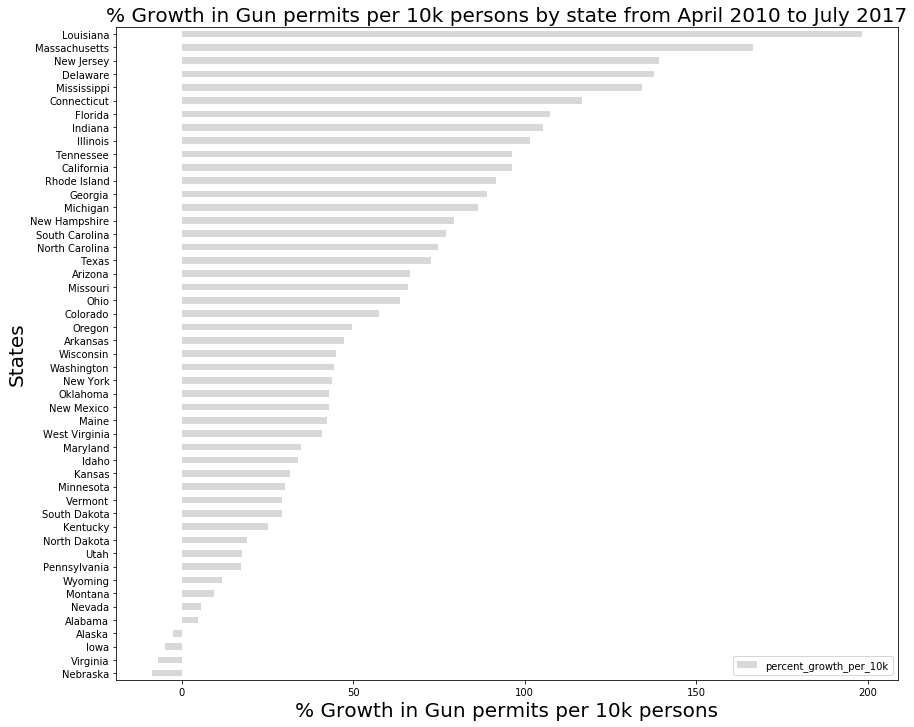

In [52]:
fig, ax = plt.subplots(1,1)
df_pop[['state','percent_growth_per_10k']].sort_values(by = 'percent_growth_per_10k').head(-1).plot(x = 'state',kind = 'barh',color = 'grey',
                                alpha = 0.3, figsize = (14,12),ax = ax)
plt.xlabel('% Growth in Gun permits per 10k persons',size = 20)
plt.ylabel('States',size = 20)
plt.title('% Growth in Gun permits per 10k persons by state from April 2010 to July 2017',size = 20);

> Louisiana (~200%), Massachusetts (160%)  and New Jersey (~145%) have had the highest growth in guns sales per 10,000 people. Nebraska, Virginia and Iowa have seen a decline in gun sales per 10,000 people. 

## 4. What Census factors correlate the most with gun sales?

In [53]:
#extract the last month from the dataset
last_guns = guns[(guns.index == '2017-09-01')][['state','total_guns']]

In [54]:
#pivot the data to have months as columns and states as index
last_guns = last_guns.pivot_table(columns='month',index = 'state',values = 'total_guns').reset_index()

In [55]:
#rename columns
last_guns.columns = ['state','guns_2017']

In [56]:
#merge filtered guns data and census data
df_merged_guns_census = last_guns.merge(census,on = 'state')

In [57]:
df_merged_guns_census.head()

state  guns_2017  all_firms__2012  \
0     Alabama    12275.0         374153.0   
1      Alaska     5469.0          68032.0   
2     Arizona    19929.0         499926.0   
3    Arkansas    10575.0         231959.0   
4  California    64730.0        3548449.0   

   american_indian_and_alaska_native_alone__percent__july_1__2016___(v2016)  \
0                                                0.7                          
1                                               15.2                          
2                                                5.4                          
3                                                1.0                          
4                                                1.7                          

   asian_alone__percent__july_1__2016___(v2016)  \
0                                           1.4   
1                                           6.3   
2                                           3.4   
3                                           1.6   
4                                          14.8   

   bachelor's_degree_or_higher__percent_of_persons_age_25_years+__2011-2015  \
0                                               23.5                          
1                                               28.0                          
2                                               27.5                          
3                                               21.1                          
4                                               31.4                          

   black_or_african_american_alone__percent__july_1__2016___(v2016)  \
0                                               26.8                  
1                                                3.8                  
2                                                4.9                  
3                                               15.7                  
4                                                6.5                  

   building_permits__2016  female_persons__percent___july_1__2016___(v2016)  \
0                 15001.0                                              51.6   
1                  1503.0                                              47.7   
2                 35578.0                                              50.3   
3                  9474.0                                              50.9   
4                102350.0                                              50.3   

   female_persons__percent__april_1__2010  \
0                                    51.5   
1                                    48.0   
2                                    50.3   
3                                    50.9   
4                                    50.3   

   foreign_born_persons__percent__2011-2015  \
0                                       3.5   
1                                       7.4   
2                                      13.5   
3                                       4.7   
4                                      27.0   

   high_school_graduate_or_higher__percent_of_persons_age_25_years+__2011-2015  \
0                                               84.3                             
1                                               92.1                             
2                                               86.0                             
3                                               84.8                             
4                                               81.8                             

   hispanic_or_latino__percent__july_1__2016___(v2016)  households__2011-2015  \
0                                                4.2                1848325.0   
1                                                7.0                 250969.0   
2                                               30.9                2412212.0   
3                                                7.3                1138025.0   
4                                               38.9               12717801.0   

   housing_units___july_1__2016___(v2016)  h

In [58]:
#list of columns to plot against guns permits by year
cols = df_merged_guns_census.columns.drop(['state','guns_2017']).tolist()

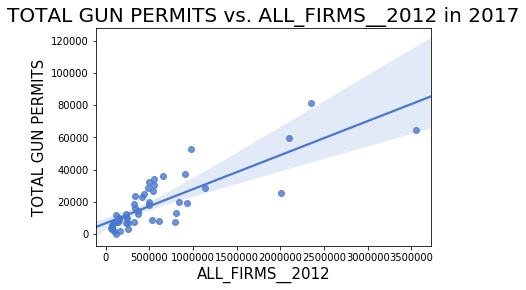

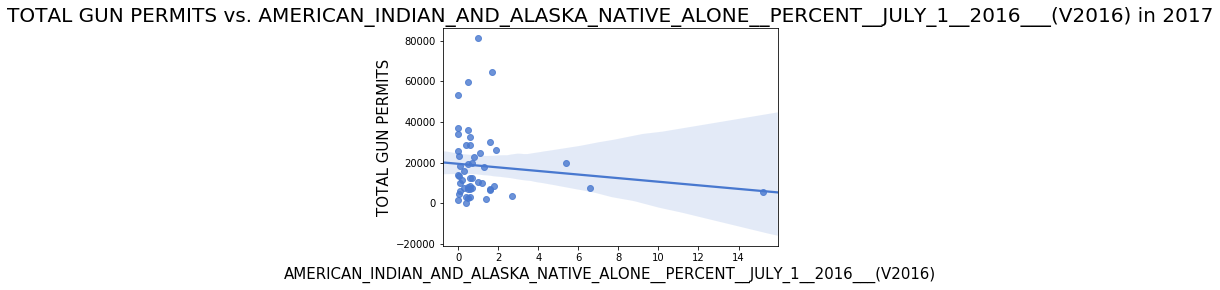

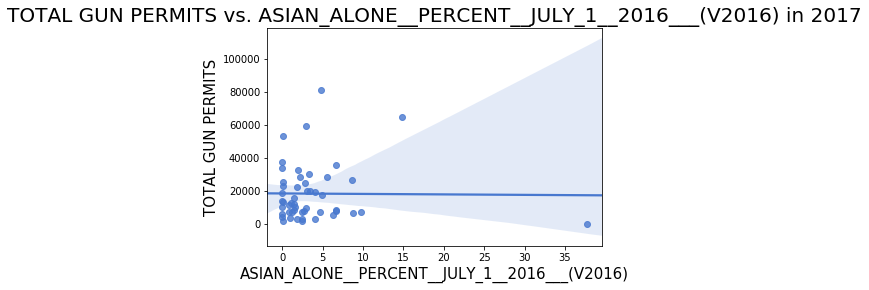

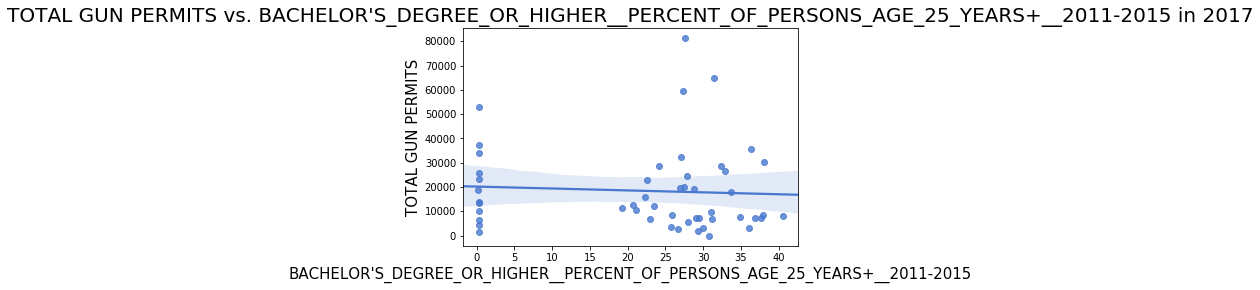

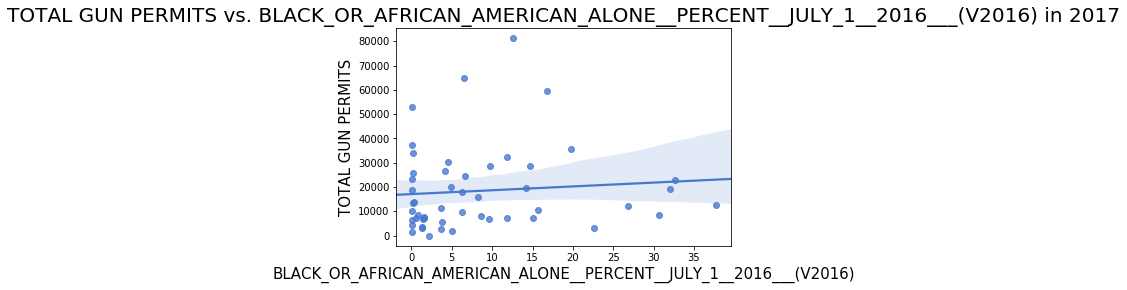

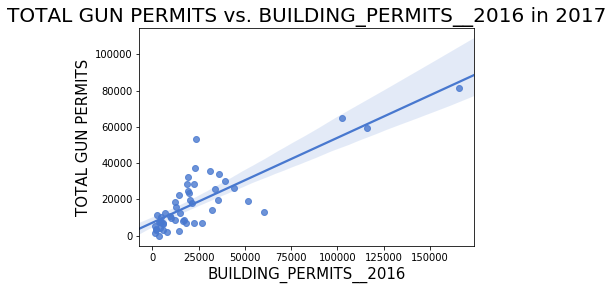

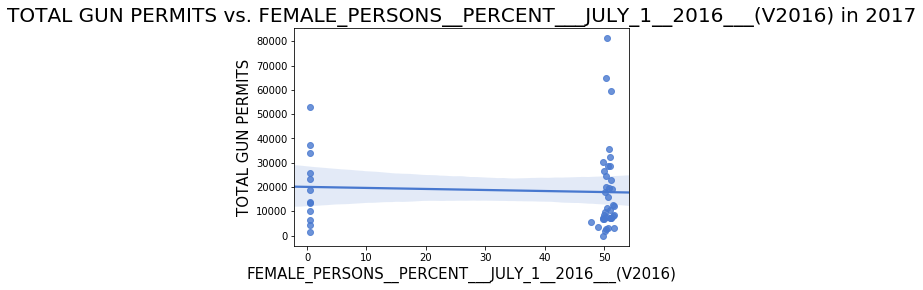

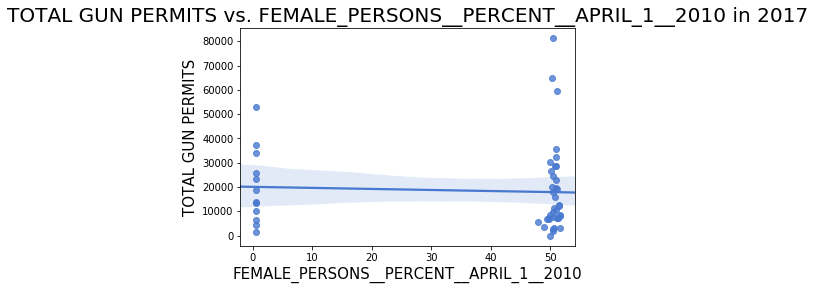

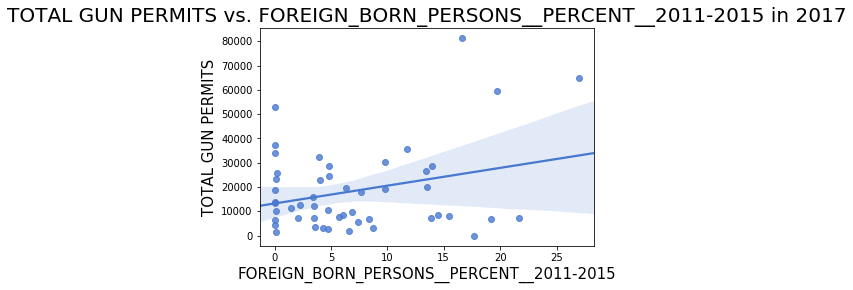

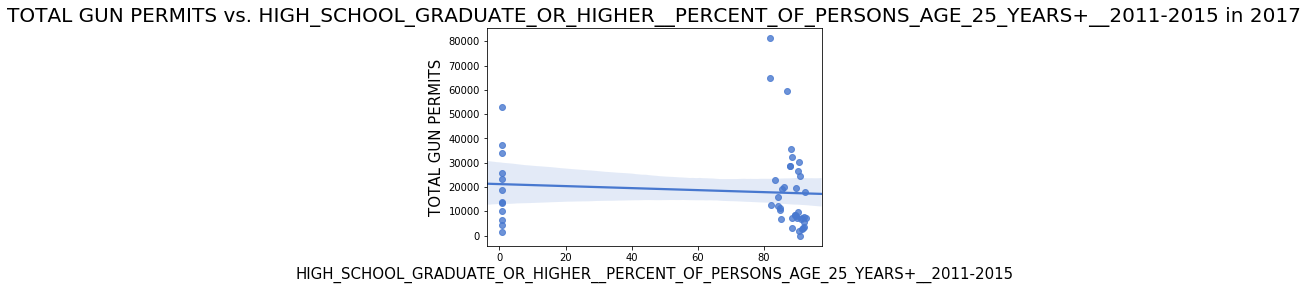

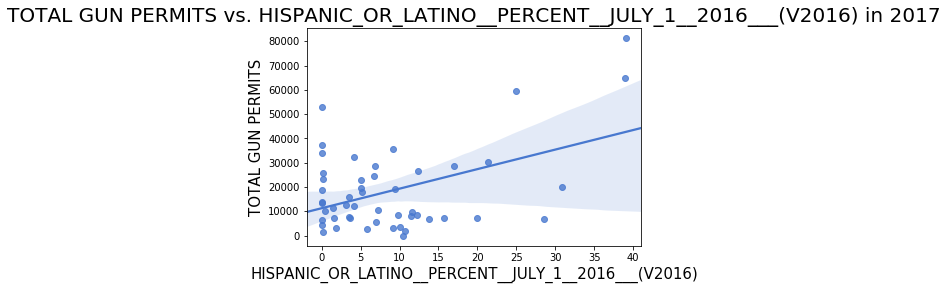

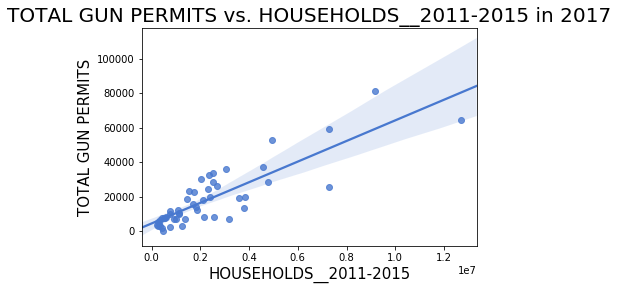

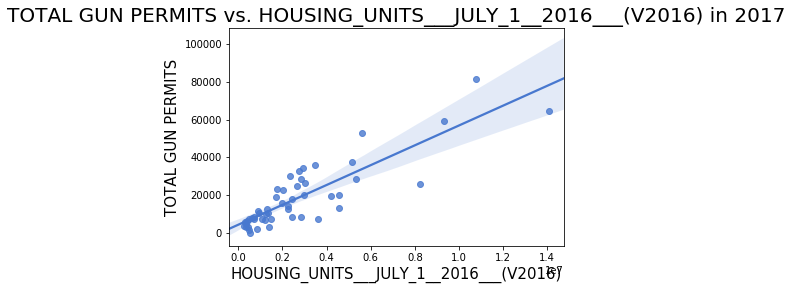

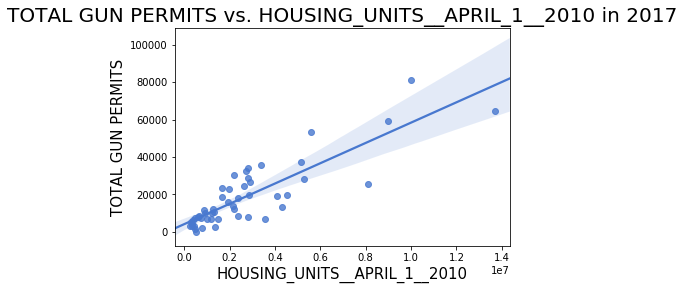

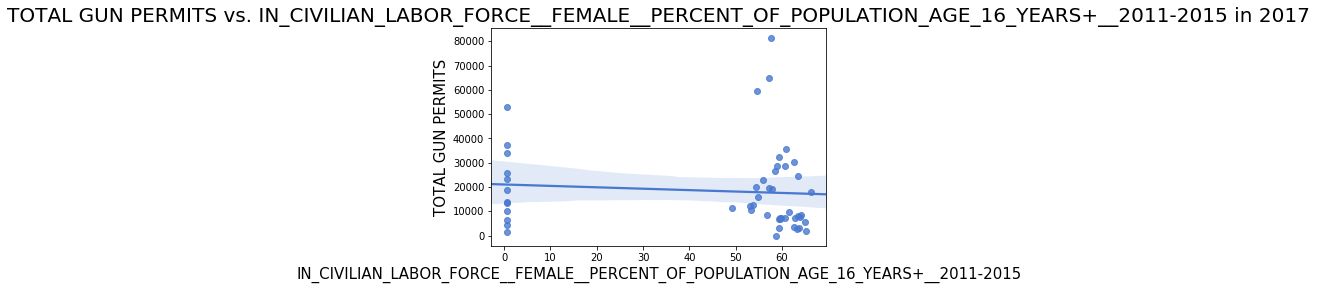

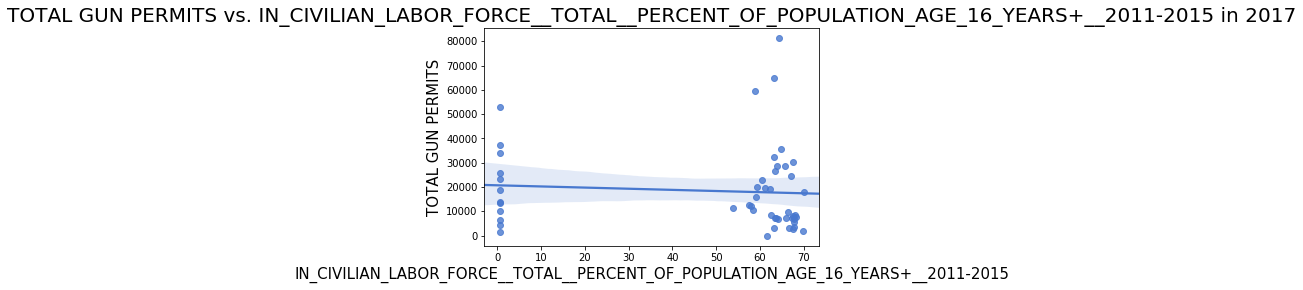

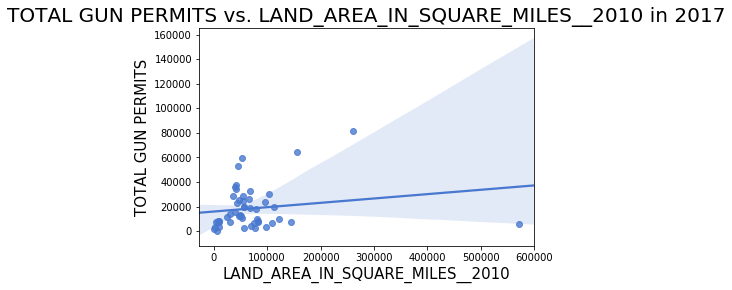

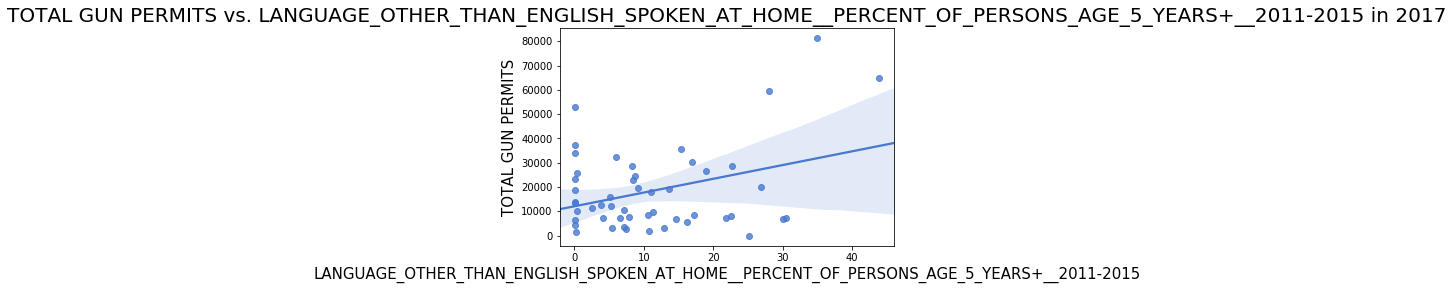

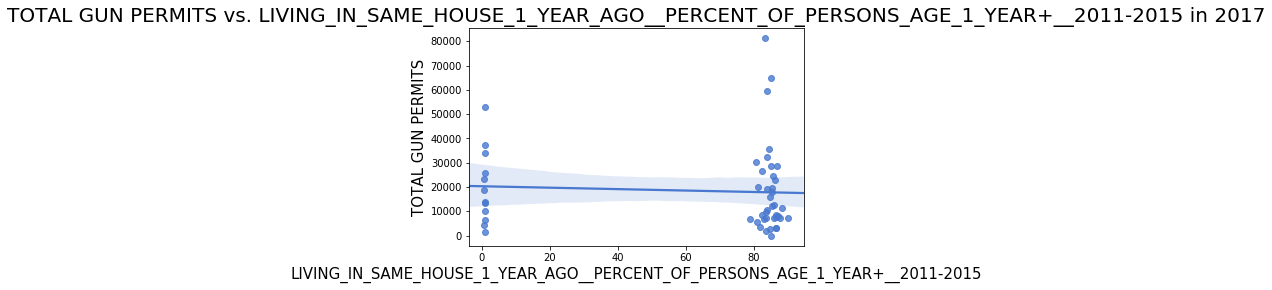

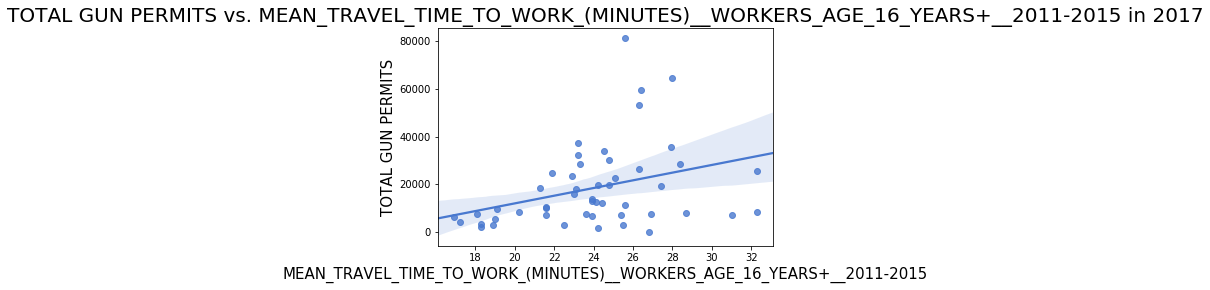

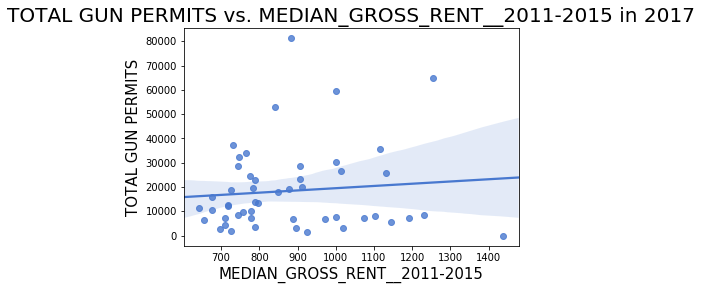

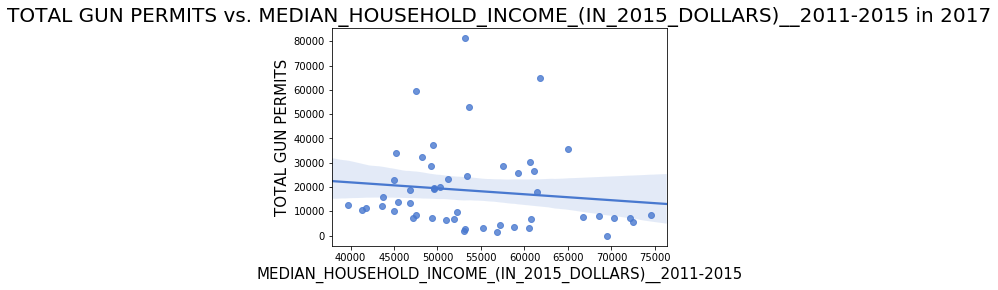

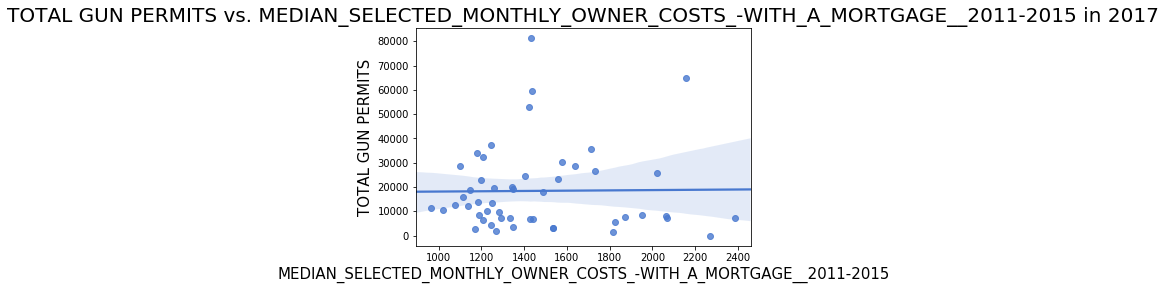

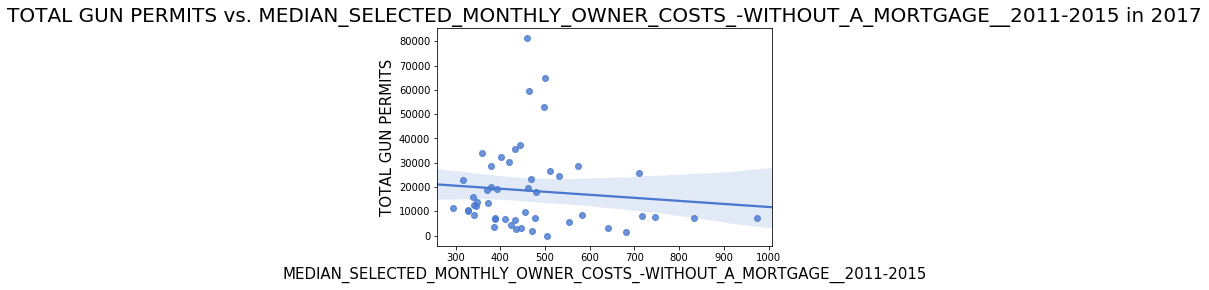

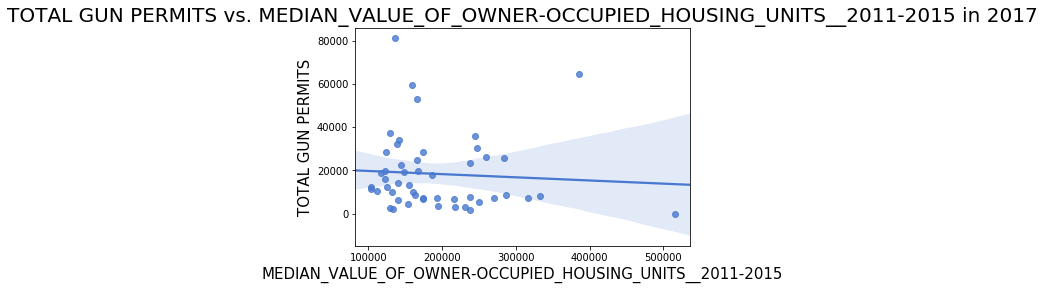

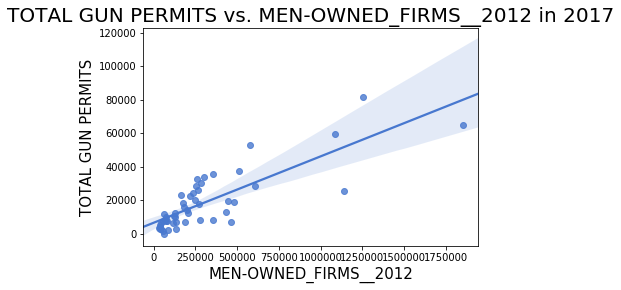

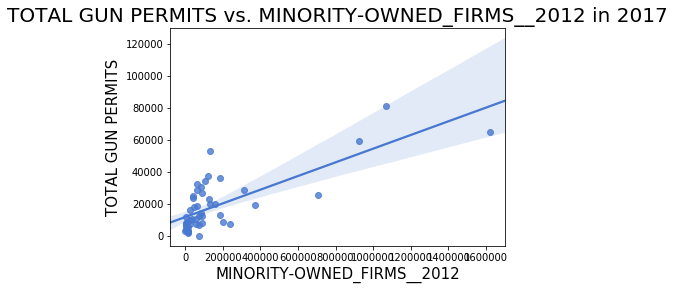

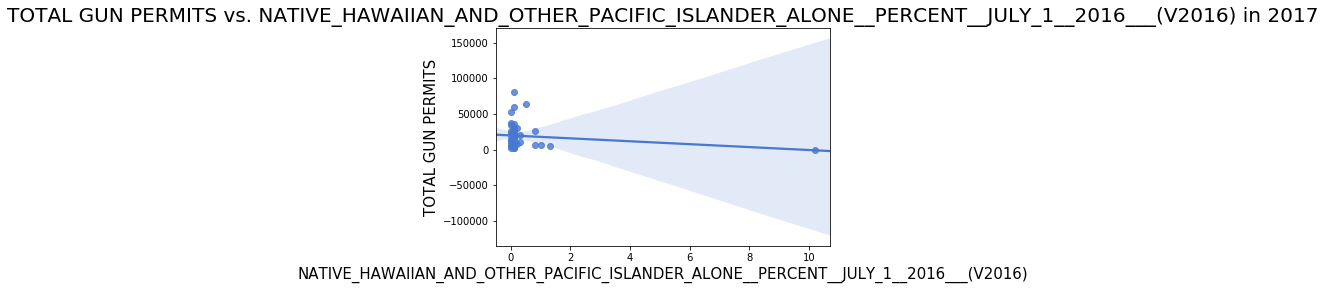

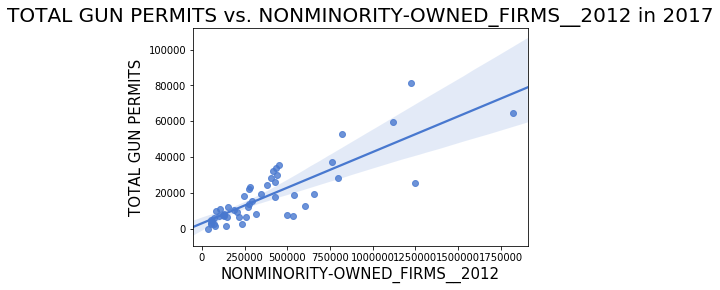

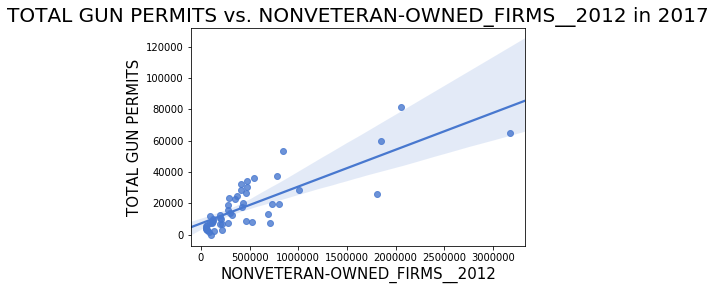

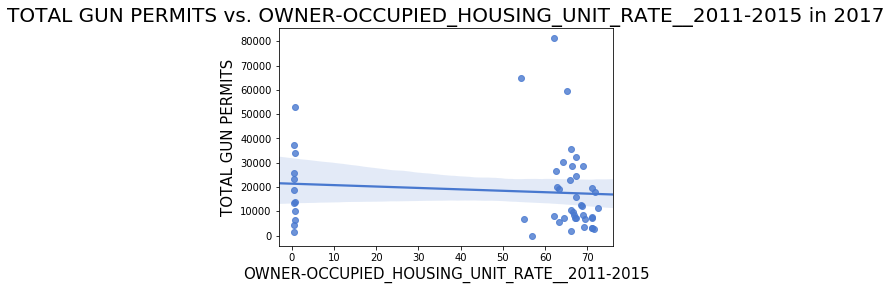

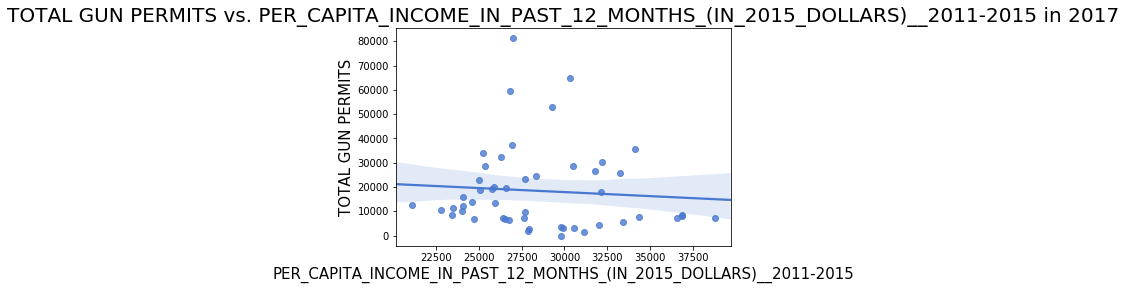

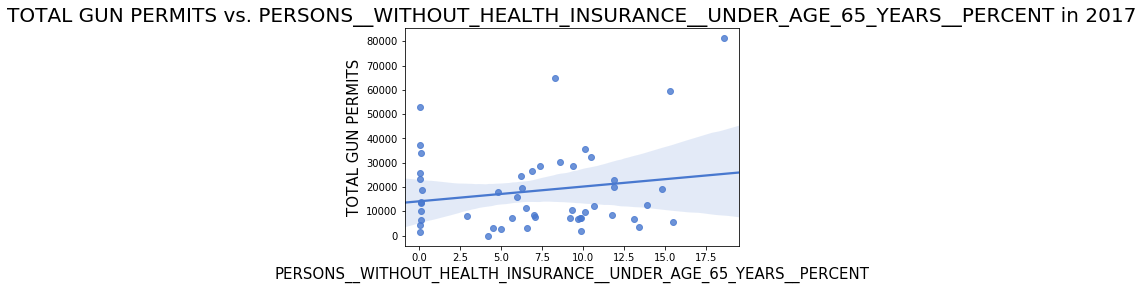

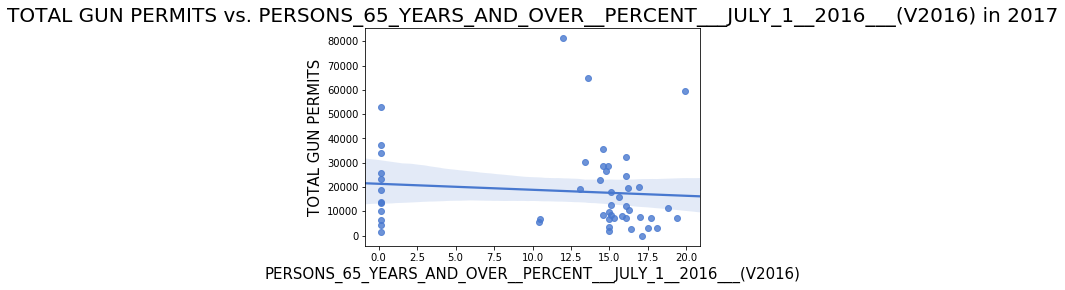

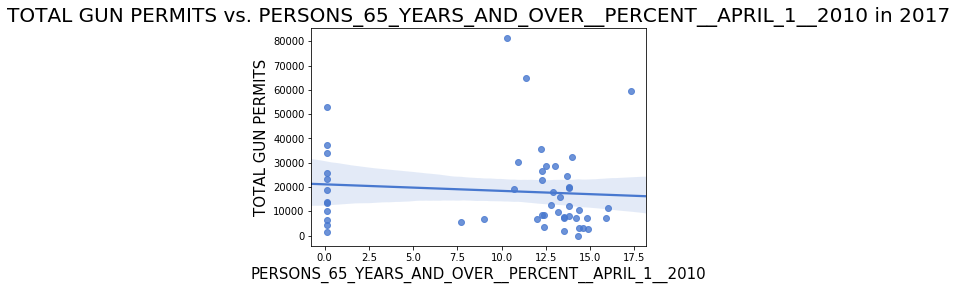

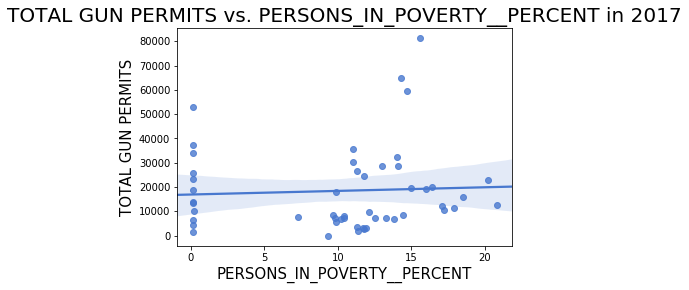

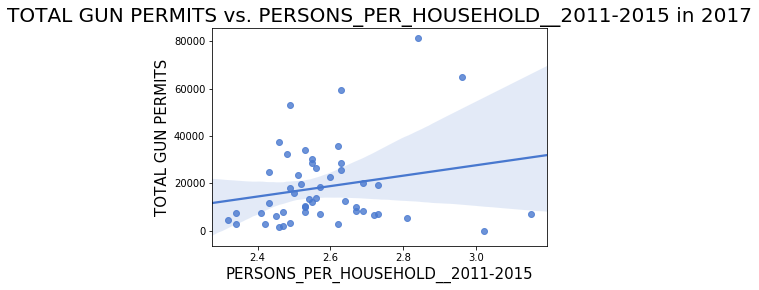

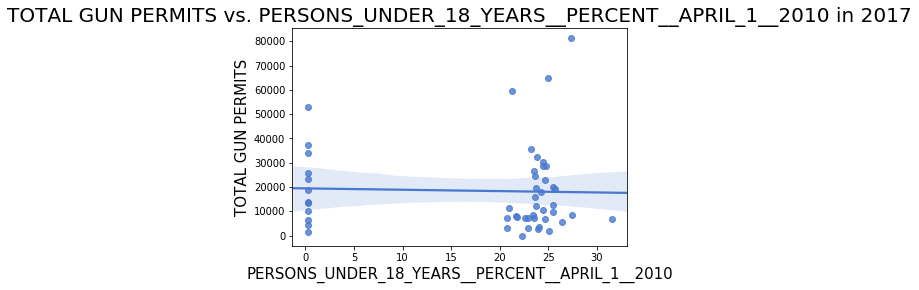

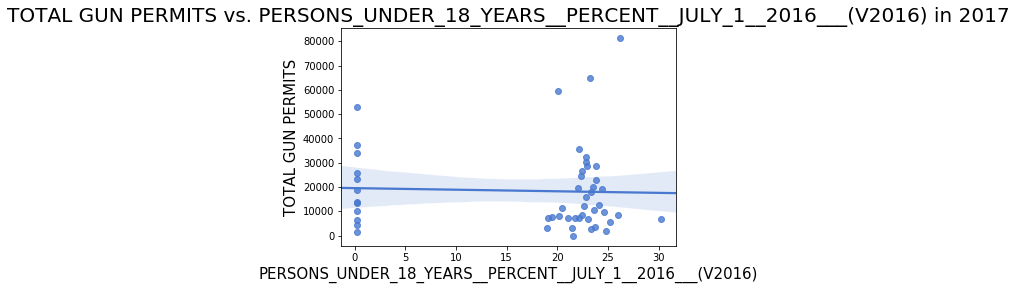

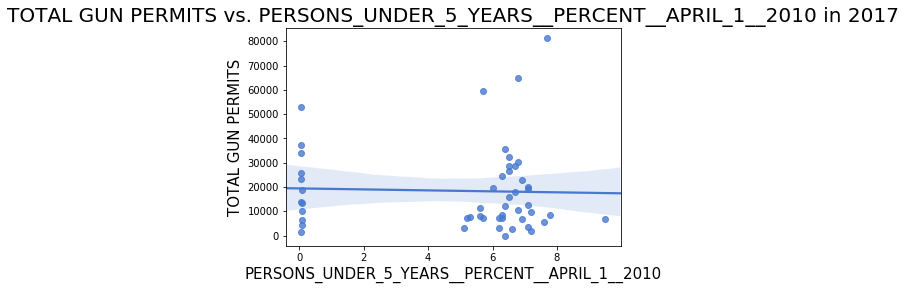

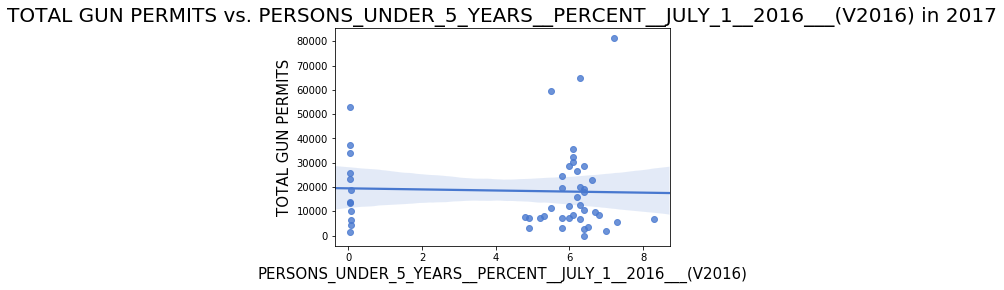

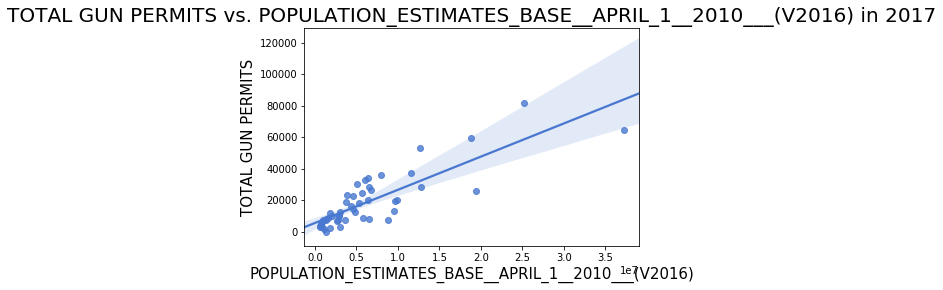

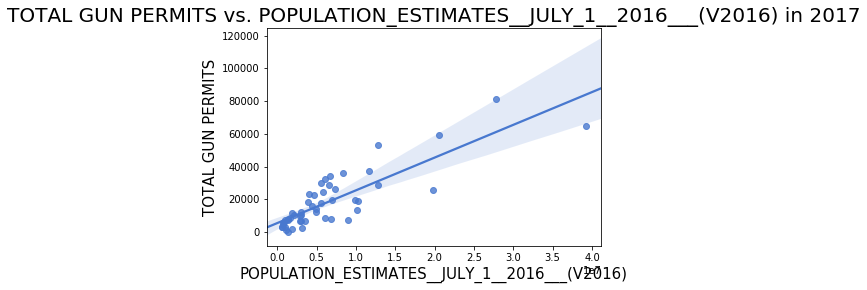

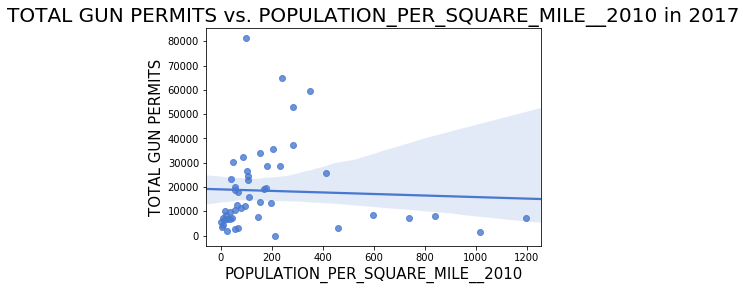

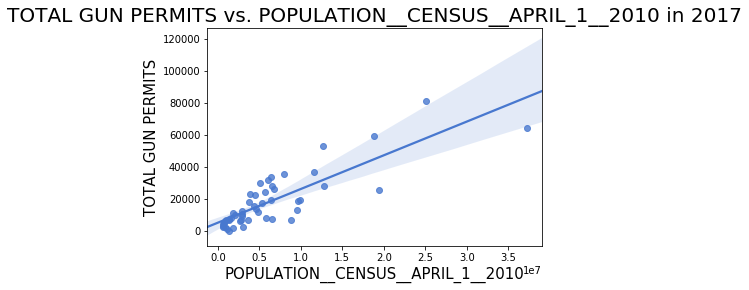

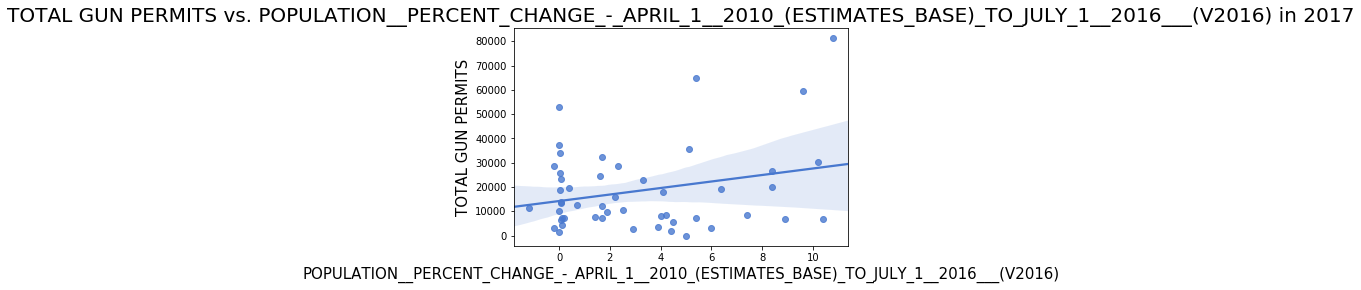

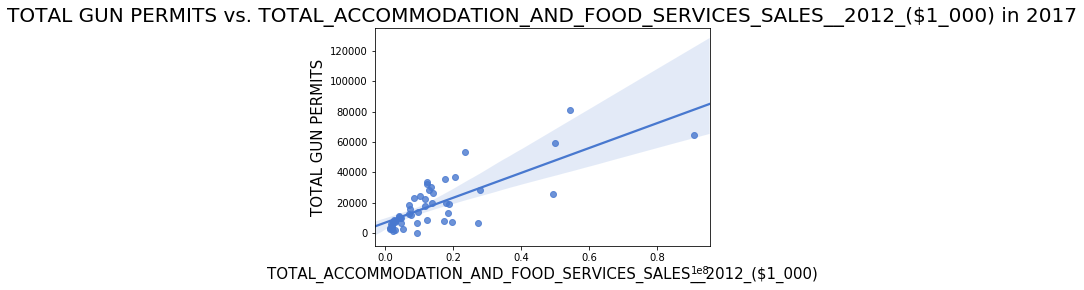

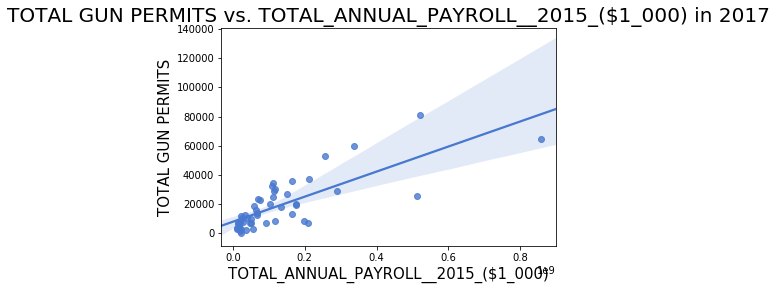

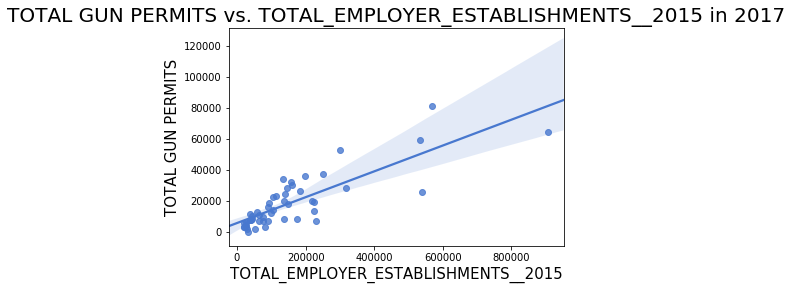

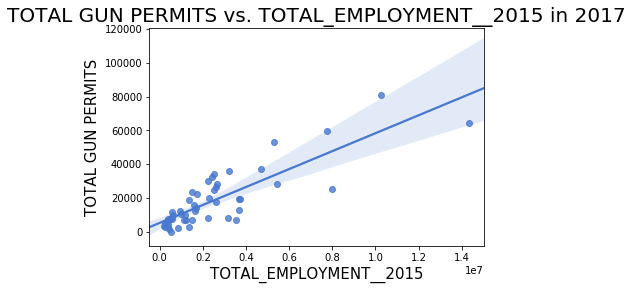

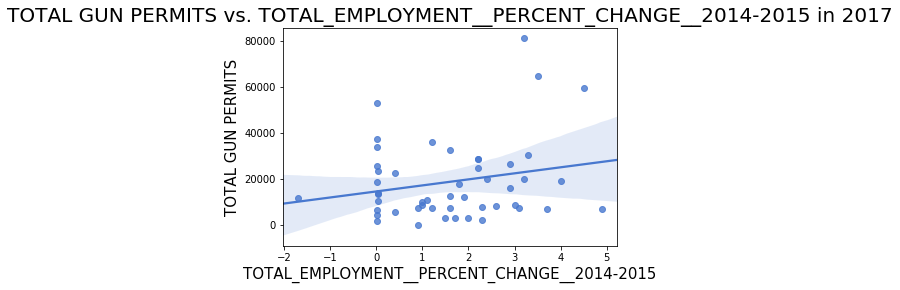

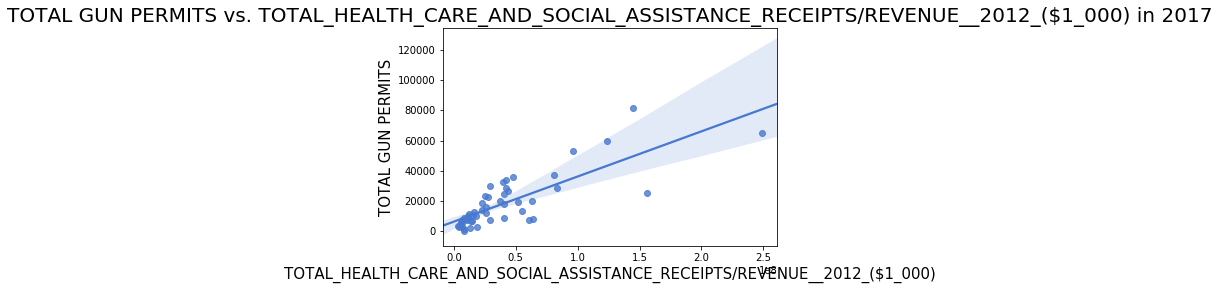

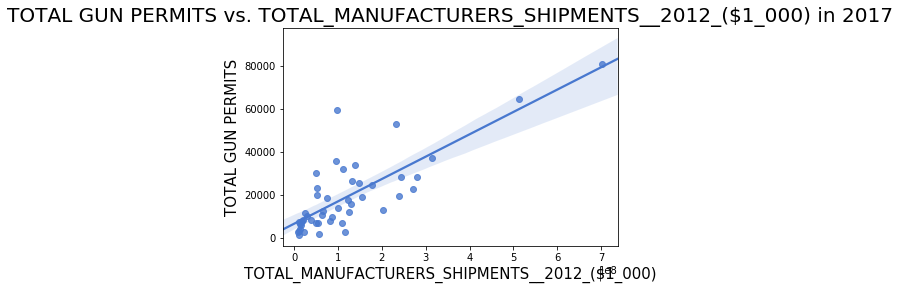

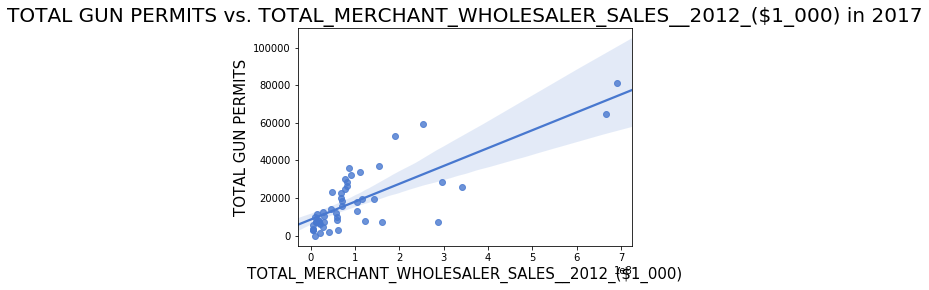

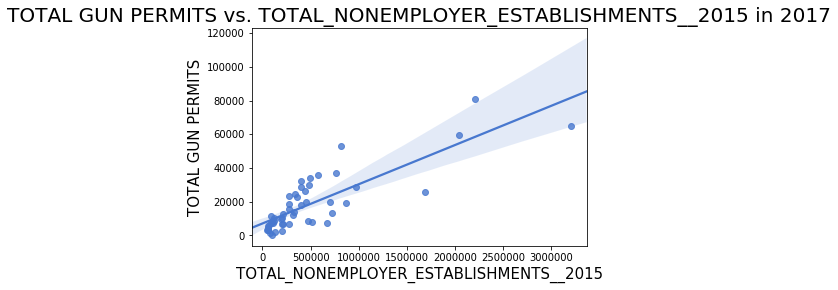

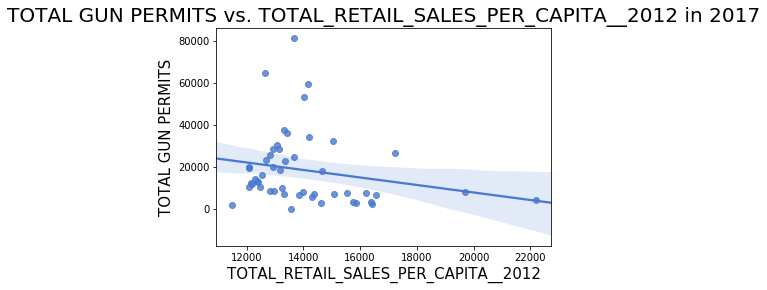

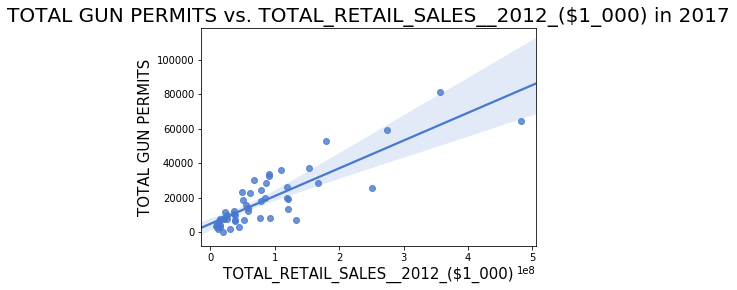

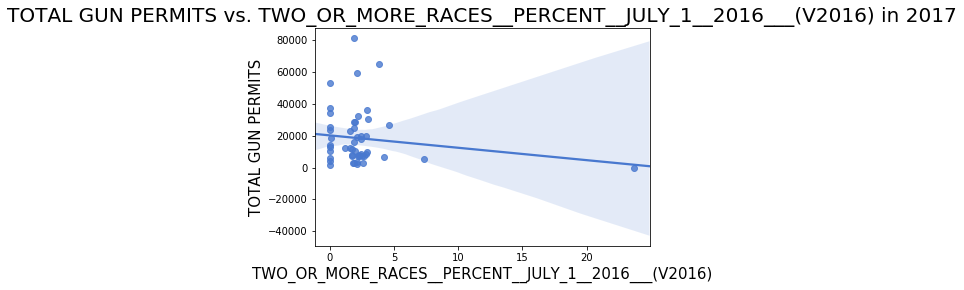

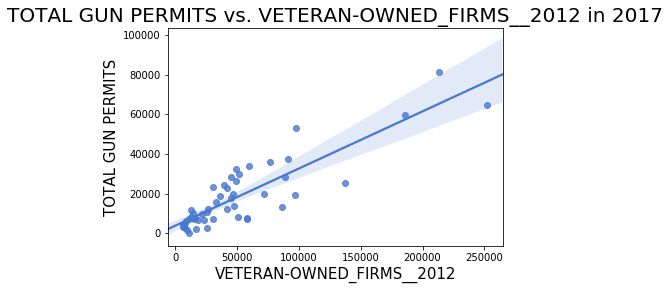

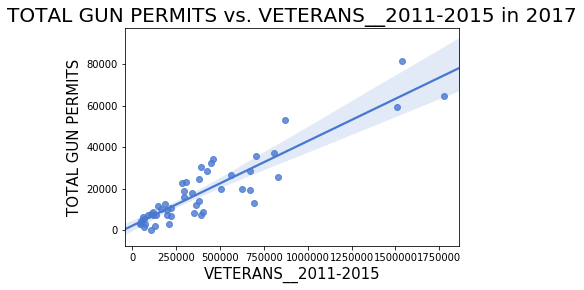

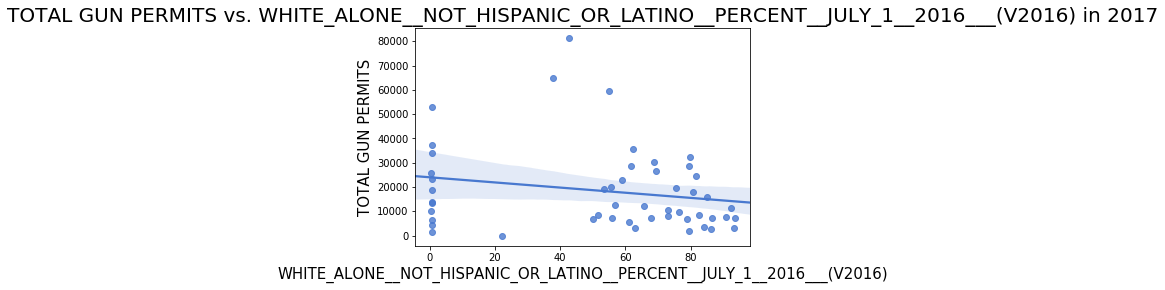

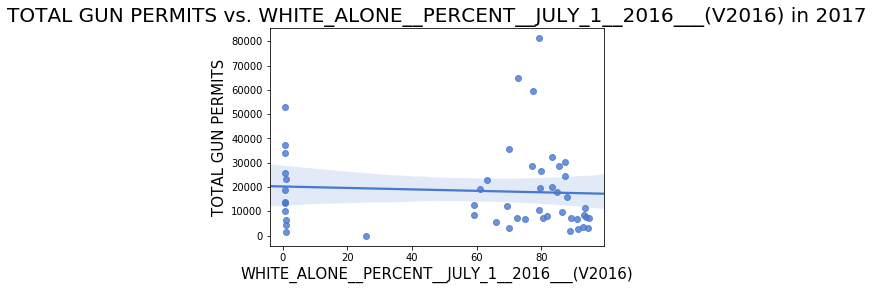

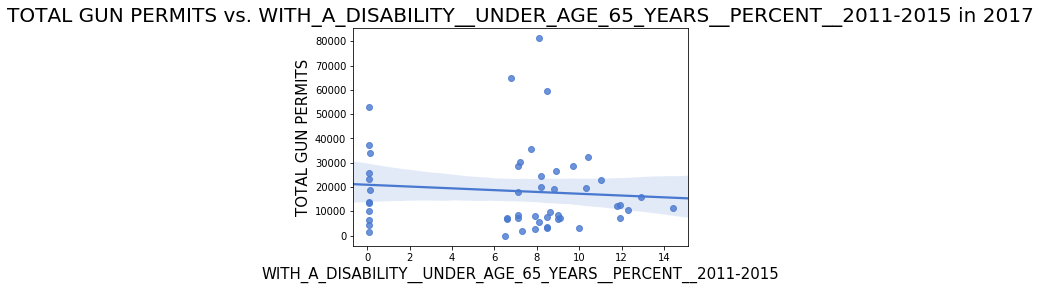

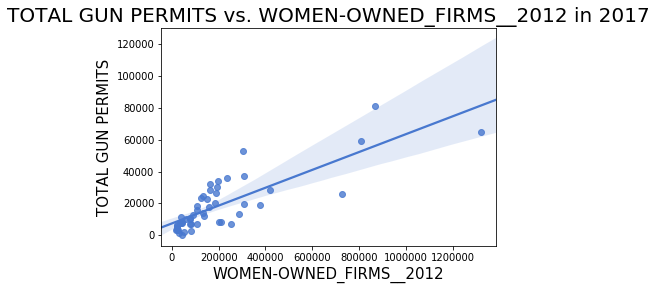

In [59]:
for i in cols:
    sns.regplot(x = i, y = 'guns_2017', data = df_merged_guns_census)
    plt.title('TOTAL GUN PERMITS vs. ' + str(i).upper() + ' in 2017',size = 20)
    plt.xlabel(i.upper(), size = 15)
    plt.ylabel('TOTAL GUN PERMITS', size = 15)
    plt.show()

> Number of Veterans, Total Retail Sales and Total Manufacturers Shipments seem to be the most coorelated with Total Gun permits 

## Conclusion

##### Findings
>1. There's an upward trend in gun permits ranging from 750,000 gun permits in 1998 to maxing out at 2,000,000 2013 and 2016. December has the highest number of overall background checks.
2. In raw gun permit numbers, Texas, California, and Pennsylvania are at the top. From a growth perspective, Massachusetts, New Hampshire, and South Dakota have seen a massive growth in gun permits from 1998 to 2017.
3. As population grew across the U.S., Louisiana, Massachusetts, and New Jersey have seen the most growth between 2010 and 2016 per 10K people. 
4. Number of veterans, Total Retail Sales, and Total Manufacturers Shipments are positively coorelated with Total gun permits.

##### Challenges
>1. Due to an unclear distinction between permits and guns (including handguns, long guns and others) and some states reporting data monthly (which overestimates permit counts), its very difficult to make an accurate judgement on the total number of gun sales in the country. 
2. Due to Census data being disparate (only available for certain years), made analyzing census metrics, alongside with correlation and causation, challenging. A richer dataset with yearly breakouts, would further help with the gun sales analysis. 